In [2]:
import pandas as pd
import numpy as np
import re
import hashlib
import pycountry
from geopy.geocoders import Nominatim
from math import radians, sin, cos, sqrt, atan2
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel("C:/Users/Admin-/Desktop/January/week_6/Assignment/DS-jobs - DS-jobs 1.xlsx")
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWeâ€™re looking for a data scientis...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [4]:
# Data Cleaning and Preprocessing
# 1. Detail Parsing of Salary Information
#   ~  Remove Currency Symbols: Remove ”$” or other currency symbols from ”Salary Estimate” to simplify the salary parsing process.
def remove_currency_symbols(estimated_sal):
    """
    Removes currency symbols (e.g., '$', '€', etc.) and other non-numeric characters 
    from the salary estimate string, leaving only numeric values and 'K' for thousands.
    
    Args:
        estimated_sal (str): The salary estimate as a string, potentially containing 
                              currency symbols and other non-relevant characters.
    
    Returns:
        str: The cleaned salary string, containing only numbers and 'K' for thousands, 
             without any currency symbols or extraneous characters.
    """
    
    # Using regular expression to remove any character that is not a digit, 'K' (for thousands), or '-'.
    return re.sub(r'[^\dK\-]', '', str(estimated_sal))

df['Cleaned salary'] = df['Salary Estimate'].apply(remove_currency_symbols)

df_cleaned = df[['Cleaned salary']]

In [5]:
df_cleaned

,Cleaned salary
0,137K-171K
1,137K-171K
2,137K-171K
3,137K-171K
4,137K-171K
...,...
667,105K-167K
668,105K-167K
669,105K-167K
670,105K-167K


In [6]:
# Handle Special Characters in Text Columns
''' 1. Text Standardization : Remove or replace special characters (e.g.,”\n”, ”\t”, and other symbols) from columns like ”Job Description”
 and ”Company Name” for consistency '''

def clean_job_description(text):
    """
    Cleans and standardizes job description text by removing unwanted characters 
    and replacing encoding artifacts, newlines, tabs, and excess spaces for consistency.
    
    Args:
        text (str): The job description text that may contain encoding issues, 
                    unwanted special characters, newlines, tabs, and extra spaces.
    
    Returns:
        str: A cleaned version of the job description, with all unwanted characters 
             removed, and newlines/tabs replaced by spaces.
    """
    if isinstance(text, str): # Checking that the input is a string or not
        text = text.replace('â€¢', '-') # Replacing â€¢ with -
        
        text = re.sub(r'[\n\t\r\s+]', ' ', text)    # Replacing newline, tab, return carriages and extra spaces with " " 

        text = re.sub(r'[^\w\s\.\,\-\•]', '', text)     #  Removing all text, other than the specified
        
        text = text.strip()
    
    return text

df_cleaned['Cleaned Job Description'] = df['Job Description'].apply(clean_job_description)

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1041641787.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned Job Description'] = df['Job Description'].apply(clean_job_description)


In [7]:
df_cleaned

,Cleaned salary,Cleaned Job Description
0,137K-171K,Description The Senior Data Scientist is resp...
1,137K-171K,"Secure our Nation, Ignite your Future Join th..."
2,137K-171K,Overview Analysis Group is one of the larges...
3,137K-171K,JOB DESCRIPTION Do you have a passion for Dat...
4,137K-171K,Data Scientist Affinity Solutions Marketing C...
...,...,...
667,105K-167K,Summary Weâre looking for a data scientist to...
668,105K-167K,Job Description Become a thought leader within...
669,105K-167K,Join a thriving company that is changing the w...
670,105K-167K,100 Remote Opportunity As an AINLP Data Scient...


In [8]:
''' Lowercasing: Convert all text columns (e.g., ”Job Title,” ”Company Name,” ”Industry”) to lowercase to standardize the format and
 avoid case sensitivity issues during analysis.
'''

text_columns = ['Job Title', "Company Name", "Industry"]
df_cleaned["Cleaned Job Description"] = df_cleaned["Cleaned Job Description"].str.lower()
df_cleaned[text_columns] = df[text_columns].apply(lambda x: x.str.lower())
df_cleaned

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1278934149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Cleaned Job Description"] = df_cleaned["Cleaned Job Description"].str.lower()
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1278934149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[text_columns] = df[text_columns].apply(lambda x: x.str.lower())
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1278934149.py:7: SettingWithCopyWarning: 
A value is trying to be se

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst\n3.1,insurance carriers
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech\n4.2,research & development
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group\n3.8,consulting
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon\n3.5,electrical & electronic manufacturing
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions\n2.9,advertising & marketing
...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact\n3.6,advertising & marketing
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,NaN
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,NaN
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated\n5.0,advertising & marketing


In [9]:
# 3. Company Name Refinement
'''Remove Rating from Company Name: Clean up ”Company Name” by removing any appended rating values (e.g., ”Company Name\n3.8”). '''

def remove_rating(company_name) :
    if isinstance(company_name, str) :
        company_name = re.sub(r'[\n\s]*\d+(\.\d+)?\s*$', '', company_name)
    return company_name

df_cleaned['Company Name'] = df_cleaned['Company Name'].apply(remove_rating)
df_cleaned

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1869319509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company Name'] = df_cleaned['Company Name'].apply(remove_rating)


,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,insurance carriers
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,research & development
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,consulting
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,electrical & electronic manufacturing
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,advertising & marketing
...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,advertising & marketing
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,NaN
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,NaN
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,advertising & marketing


In [10]:
'''3.2 UniqueCompanyIdentifier: Generate a unique identifier for each company based on the cleaned ”Company Name” to help with comparisons'''

def generate_unique_company_id(company_name, existing_ids):
    if isinstance(company_name, str):
        short_name = company_name[:6] 
        
        hash_part = hashlib.md5(company_name.encode('utf-8')).hexdigest()[:6]
        
        unique_id = f"{short_name}_{hash_part}"

        counter = 1
        while unique_id in existing_ids:
            unique_id = f"{short_name}_{hash_part}_{counter}"
            counter += 1
            
        existing_ids.add(unique_id) 
        return unique_id
    return None

existing_ids = set()

df_cleaned['UniqueCompanyIdentifier'] = df_cleaned['Company Name'].apply(lambda x: generate_unique_company_id(x, existing_ids))

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\4096677349.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['UniqueCompanyIdentifier'] = df_cleaned['Company Name'].apply(lambda x: generate_unique_company_id(x, existing_ids))


In [11]:
# 4. Standardizing Location Data
'''Expand State Abbreviations: For the ”Location” column, expand state abbreviations (e.g., ”CA” → ”California”) to ensure uniformity.'''

def expand_state_abbreviation(location) :
    try :
        city_state = location.split(',')
        city = city_state[0].strip()
        state = city_state[1].strip()
        country = pycountry.countries.get(alpha_2=state)
        return city, country.name
    except Exception as e:
        print(e)
        return location
    
df_cleaned['Expanded Location'] = df['Location'].apply(expand_state_abbreviation)

'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
list index out of range
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
list index out of range
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
list index out of range
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'NoneType' object has no attribute 'name'
'Non

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1641528413.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Expanded Location'] = df['Location'].apply(expand_state_abbreviation)


In [12]:
# 5. Revenue Column Parsing and Cleaning
''' Extract Revenue Range: For each value in ”Revenue,” extract minimum and maximum revenue values to separate columns.'''

def extract_revenue_range(revenue):
    if isinstance(revenue, str):
        revenue = revenue.replace("million", "").replace("billion", "").strip()
        
        range_pattern = r'(\$[\d,\.]+)\s*to\s*(\$[\d,\.]+)\s*(million|billion)?' 
        single_value_pattern = r'(\$[\d,\.]+\+?)\s*(million|billion)?'  

        range_match = re.search(range_pattern, revenue)
        if range_match:
            min_revenue = range_match.group(1).replace("$", "").strip()
            max_revenue = range_match.group(2).replace("$", "").strip()
            unit = range_match.group(3) if range_match.group(3) else "million" 
            min_revenue = f"{min_revenue} {unit}"
            max_revenue = f"{max_revenue} {unit}"
            return min_revenue, max_revenue
        
        single_value_match = re.search(single_value_pattern, revenue)
        if single_value_match:
            min_revenue = single_value_match.group(1).replace("$", "").strip()
            max_revenue = min_revenue  
            unit = single_value_match.group(2) if single_value_match.group(2) else "million"  
            min_revenue = f"{min_revenue} {unit}"
            max_revenue = f"{max_revenue} {unit}"
            return min_revenue, max_revenue
        
    return None, None  

df_cleaned[['Min Revenue', 'Max Revenue']] = df['Revenue'].apply(lambda x: pd.Series(extract_revenue_range(x)))

df_cleaned['Min Revenue'] = df_cleaned['Min Revenue'].fillna('Unknown')
df_cleaned['Max Revenue'] = df_cleaned['Max Revenue'].fillna('Unknown')

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\660328484.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Min Revenue', 'Max Revenue']] = df['Revenue'].apply(lambda x: pd.Series(extract_revenue_range(x)))
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\660328484.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Min Revenue', 'Max Revenue']] = df['Revenue'].apply(lambda x: pd.Series(extract_revenue_range(x)))
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\660328484

In [13]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,insurance carriers,health_14cf67,"New York, NY",Unknown,Unknown
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,research & development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,electrical & electronic manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,advertising & marketing,affini_38b562,"New York, NY",Unknown,Unknown
...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,advertising & marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,NaN,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,NaN,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,advertising & marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million


In [14]:
df_cleaned["Rating"] = df["Rating"]
df_cleaned["Size"] = df["Size"]
df_cleaned["Founded"] = df["Founded"]
df_cleaned["Type of ownership"] = df["Type of ownership"]
df_cleaned["Industry"] = df["Industry"]
df_cleaned["Sector"] = df["Sector"]
df_cleaned["Competitors"] = df["Competitors"]
df_cleaned["Headquarters"] = df["Headquarters"]

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3515134106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Rating"] = df["Rating"]
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3515134106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Size"] = df["Size"]
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3515134106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [15]:
# 6. Missing Data Handling:

df_cleaned["Industry"] = df_cleaned["Industry"].replace(-1, 'Not Defined')
df_cleaned["Sector"] = df_cleaned["Sector"].replace(-1, "Not Defined")
df_cleaned["Rating"] = df_cleaned["Rating"].replace(-1, None)
df_cleaned["Competitors"] = df_cleaned["Competitors"].replace(-1, None)

In [16]:
# ''' Distance Calculation: If city and state information are available, create approximate distance calculations between ”Location” and
#  ”Headquarters” to identify remote positions.'''

# geolocator = Nominatim(user_agent="distance_calculator")

# # Function to standardize and get coordinates from city and country
# def get_coordinates(location):
#     # Check if the location is a tuple (e.g., ('Newton', 'Morocco'))
#     if isinstance(location, tuple):
#         location = ', '.join(location)  # Convert tuple to string in 'City, Country' format

#     try:
#         # Perform geocoding to get latitude and longitude
#         location = geolocator.geocode(location)
#         if location:
#             return location.latitude, location.longitude
#         else:
#             return None, None  # Return None if location is not found
#     except Exception as e:
#         print(f"Error in geocoding: {e}")
#         return None, None

# # Haversine distance function
# def haversine(lat1, lon1, lat2, lon2):
#     # Radius of the Earth in kilometers
#     R = 6371.0

#     # Convert degrees to radians
#     lat1 = radians(lat1)
#     lon1 = radians(lon1)
#     lat2 = radians(lat2)
#     lon2 = radians(lon2)

#     # Haversine formula
#     dlat = lat2 - lat1
#     dlon = lon2 - lon1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c  # Distance in kilometers
#     return distance

# # Function to calculate distance between 'Location' and 'Headquarters'
# def calculate_distance(row, index):
#     location = row['Expanded Location']  # Use the Expanded Location
#     headquarters = row['Headquarters']
    
#     # Get coordinates for both Location and Headquarters
#     lat_loc, lon_loc = get_coordinates(location)
#     lat_head, lon_head = get_coordinates(headquarters)
    
#     # Print the index to know the progress
#     print(f"Processing index {index + 1} of {len(df_cleaned)}...")
    
#     if lat_loc is not None and lat_head is not None:
#         distance = haversine(lat_loc, lon_loc, lat_head, lon_head)
#         return distance
#     else:
#         return None  # Return None if coordinates are not found

# # Apply the distance calculation function to the dataframe and add index
# df_cleaned['Distance (km)'] = df_cleaned.apply(lambda row: calculate_distance(row, row.name), axis=1)

# # Check the output to see the new column with distances
# print(df_cleaned[['Expanded Location', 'Headquarters', 'Distance (km)']])


In [17]:
# 7. Cleaning and Extracting Data from ”Job Description”
'''Length Calculation: Create a column to calculate the word count or character length of each ”Job Description” to help filter lengthy
        descriptions.
 '''

def calculate_word_count(description):
    if isinstance(description, str):
        return len(description.split())  
    return 0  

def calculate_character_length(description):
    if isinstance(description, str):
        return len(description)
    return 0  

df_cleaned['Job Description Word Count'] = df_cleaned['Cleaned Job Description'].apply(calculate_word_count)
df_cleaned['Job Description Character Length'] = df_cleaned['Cleaned Job Description'].apply(calculate_character_length)

In [18]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,Size,Founded,Type of ownership,Sector,Competitors,Headquarters,Job Description Word Count,Job Description Character Length
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,1001 to 5000 employees,1993,Nonprofit Organization,Insurance,"EmblemHealth, UnitedHealth Group, Aetna","New York, NY",467,3373
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,5001 to 10000 employees,1968,Company - Public,Business Services,None,"Herndon, VA",539,4046
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,1001 to 5000 employees,1981,Private Practice / Firm,Business Services,None,"Boston, MA",1263,8694
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,501 to 1000 employees,2000,Company - Public,Manufacturing,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...","Bad Ragaz, Switzerland",451,3331
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,51 to 200 employees,1998,Company - Private,Business Services,"Commerce Signals, Cardlytics, Yodlee","New York, NY",377,2710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,1001 to 5000 employees,1989,Company - Private,Business Services,None,"Fort Lee, NJ",556,3633
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,-1,-1,-1,Not Defined,None,-1,162,1249
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,-1,-1,-1,Not Defined,None,-1,391,2777
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,1 to 50 employees,-1,Company - Private,Business Services,None,"Santa Clara, CA",454,3413


In [19]:
''' Remote Work Flag: Identify if the job allows remote work by checking for keywords (like ”remote,” ”telecommute”) in the ”Job
 Description”.'''

def check_remote_work(description):
    remote_keywords = ['remote', 'telecommute', 'work from home', 'virtual', 'telework']
    
    if isinstance(description, str):
        for keyword in remote_keywords:
            if keyword in description:
                return True  
    return False  

df_cleaned['Remote Work Flag'] = df_cleaned['Cleaned Job Description'].apply(check_remote_work)

In [20]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,Size,Founded,Type of ownership,Sector,Competitors,Headquarters,Job Description Word Count,Job Description Character Length,Remote Work Flag
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,1001 to 5000 employees,1993,Nonprofit Organization,Insurance,"EmblemHealth, UnitedHealth Group, Aetna","New York, NY",467,3373,False
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,5001 to 10000 employees,1968,Company - Public,Business Services,None,"Herndon, VA",539,4046,False
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,1001 to 5000 employees,1981,Private Practice / Firm,Business Services,None,"Boston, MA",1263,8694,False
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,501 to 1000 employees,2000,Company - Public,Manufacturing,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...","Bad Ragaz, Switzerland",451,3331,False
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,51 to 200 employees,1998,Company - Private,Business Services,"Commerce Signals, Cardlytics, Yodlee","New York, NY",377,2710,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,1001 to 5000 employees,1989,Company - Private,Business Services,None,"Fort Lee, NJ",556,3633,True
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,-1,-1,-1,Not Defined,None,-1,162,1249,False
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,-1,-1,-1,Not Defined,None,-1,391,2777,False
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,1 to 50 employees,-1,Company - Private,Business Services,None,"Santa Clara, CA",454,3413,True


In [21]:
'''Experience Level Parsing: Add columns to identify required experience levels (e.g., ”entry level,” ”5+ years”) by parsing 
    ”Job Description.”'''

def parse_experience_level(description):    
    if "entry level" in description:
        return "Entry Level"
    elif "junior" in description:
        return "Junior"
    elif "mid level" in description:
        return "Mid Level"
    elif "senior" in description or "lead" in description:
        return "Senior"
    else:
        return "Not Specified"

def extract_experience_years(description):
    if isinstance(description, str):
        experience_pattern = r'(\d+(\+)?\s*years?)'
        match = re.search(experience_pattern, description)
        if match:
            return match.group(0)
    return "Not Specified"

df_cleaned['Experience Level'] = df_cleaned['Cleaned Job Description'].apply(parse_experience_level)
df_cleaned['Experience in Years'] = df_cleaned['Cleaned Job Description'].apply(extract_experience_years)

In [22]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Founded,Type of ownership,Sector,Competitors,Headquarters,Job Description Word Count,Job Description Character Length,Remote Work Flag,Experience Level,Experience in Years
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,1993,Nonprofit Organization,Insurance,"EmblemHealth, UnitedHealth Group, Aetna","New York, NY",467,3373,False,Senior,Not Specified
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,1968,Company - Public,Business Services,None,"Herndon, VA",539,4046,False,Not Specified,15 years
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,1981,Private Practice / Firm,Business Services,None,"Boston, MA",1263,8694,False,Senior,Not Specified
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,2000,Company - Public,Manufacturing,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...","Bad Ragaz, Switzerland",451,3331,False,Not Specified,Not Specified
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,1998,Company - Private,Business Services,"Commerce Signals, Cardlytics, Yodlee","New York, NY",377,2710,False,Senior,Not Specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,1989,Company - Private,Business Services,None,"Fort Lee, NJ",556,3633,True,Senior,2 years
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,-1,-1,Not Defined,None,-1,162,1249,False,Senior,Not Specified
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,-1,-1,Not Defined,None,-1,391,2777,False,Not Specified,3 years
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,-1,Company - Private,Business Services,None,"Santa Clara, CA",454,3413,True,Not Specified,5 years


In [23]:
# 8. Additional Column Standardization
''' Numeric Conversion of Founding Year: Ensure ”Founded” is a
 numeric column, and set a minimum year threshold (e.g., 1800) to filter out any erroneous entries.'''

def convert_and_filter_founding_year(founded_year, min_year_threshold=1800):
    try:
        founded_year = pd.to_numeric(founded_year, errors='coerce')
        
        if pd.isna(founded_year) or founded_year < min_year_threshold:
            return None 
        return founded_year
    except Exception as e:
        print(f"Error in converting founding year: {e}")
        return None

df_cleaned['Founded'] = df_cleaned['Founded'].apply(convert_and_filter_founding_year)

In [24]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Founded,Type of ownership,Sector,Competitors,Headquarters,Job Description Word Count,Job Description Character Length,Remote Work Flag,Experience Level,Experience in Years
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,1993.0,Nonprofit Organization,Insurance,"EmblemHealth, UnitedHealth Group, Aetna","New York, NY",467,3373,False,Senior,Not Specified
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,1968.0,Company - Public,Business Services,None,"Herndon, VA",539,4046,False,Not Specified,15 years
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,1981.0,Private Practice / Firm,Business Services,None,"Boston, MA",1263,8694,False,Senior,Not Specified
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,2000.0,Company - Public,Manufacturing,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...","Bad Ragaz, Switzerland",451,3331,False,Not Specified,Not Specified
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,1998.0,Company - Private,Business Services,"Commerce Signals, Cardlytics, Yodlee","New York, NY",377,2710,False,Senior,Not Specified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,1989.0,Company - Private,Business Services,None,"Fort Lee, NJ",556,3633,True,Senior,2 years
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,NaN,-1,Not Defined,None,-1,162,1249,False,Senior,Not Specified
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,NaN,-1,Not Defined,None,-1,391,2777,False,Not Specified,3 years
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,NaN,Company - Private,Business Services,None,"Santa Clara, CA",454,3413,True,Not Specified,5 years


In [25]:
'''Size Categorization: For ”Size,” create size categories (e.g., ”small,” ”medium,” ”large”) based on ranges in employee count.'''

def categorize_size(size_str):
    try:
        if size_str == 'Unknown' or size_str is None:
            return 'Not Specified'
        
        if isinstance(size_str, str):
            size_str = size_str.lower().replace('employees', '').strip()
            
            if '+' in size_str:
                size_str = size_str.replace('+', '').strip()
                max_size = int(size_str.replace(',', ''))
                min_size = max_size
            else:
                size_range = size_str.split('to')
                
                if len(size_range) == 2:  
                    min_size = int(size_range[0].strip().replace(',', ''))
                    max_size = int(size_range[1].strip().replace(',', ''))
                else:  
                    min_size = max_size = int(size_range[0].strip().replace(',', ''))

            if min_size <= 50:
                return 'Small'
            elif min_size <= 500:
                return 'Medium'
            elif min_size <= 5000:
                return 'Large'
            else:
                return 'Very Large'
        else:
            return 'Not Specified'
        
    except Exception as e:
        print(f"Error in size categorization: {e}")
        return 'Not Specified'

df_cleaned['Size Category'] = df_cleaned['Size'].apply(categorize_size)

In [26]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Type of ownership,Sector,Competitors,Headquarters,Job Description Word Count,Job Description Character Length,Remote Work Flag,Experience Level,Experience in Years,Size Category
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,Nonprofit Organization,Insurance,"EmblemHealth, UnitedHealth Group, Aetna","New York, NY",467,3373,False,Senior,Not Specified,Large
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,Company - Public,Business Services,None,"Herndon, VA",539,4046,False,Not Specified,15 years,Very Large
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,Private Practice / Firm,Business Services,None,"Boston, MA",1263,8694,False,Senior,Not Specified,Large
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,Company - Public,Manufacturing,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...","Bad Ragaz, Switzerland",451,3331,False,Not Specified,Not Specified,Large
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,Company - Private,Business Services,"Commerce Signals, Cardlytics, Yodlee","New York, NY",377,2710,False,Senior,Not Specified,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,Company - Private,Business Services,None,"Fort Lee, NJ",556,3633,True,Senior,2 years,Large
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,-1,Not Defined,None,-1,162,1249,False,Senior,Not Specified,Not Specified
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,-1,Not Defined,None,-1,391,2777,False,Not Specified,3 years,Not Specified
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,Company - Private,Business Services,None,"Santa Clara, CA",454,3413,True,Not Specified,5 years,Small


In [27]:
# 9. Outlier Detection and Handling
'''Salary Outliers: Detect outliers in the salary range and flag unusually high or low salary estimates for each job title.'''

def extract_salary_range(salary_str):
    try:
        salary_str = salary_str.replace('K', '').strip() 
        salary_parts = salary_str.split('-')
        
        lower_salary = float(salary_parts[0].strip()) * 1000
        upper_salary = float(salary_parts[1].strip()) * 1000
        return lower_salary, upper_salary
    except Exception as e:
        print(f"Error in extracting salary range: {e}")
        return None, None

df_cleaned[['Lower Salary', 'Upper Salary']] = df_cleaned['Cleaned salary'].apply(lambda x: pd.Series(extract_salary_range(x)))

df_cleaned['Average Salary'] = df_cleaned[['Lower Salary', 'Upper Salary']].mean(axis=1)

def flag_salary_outliers(df):
    Q1 = df['Average Salary'].quantile(0.25)
    Q3 = df['Average Salary'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df['Salary Outlier'] = np.where((df['Average Salary'] < lower_bound) | (df['Average Salary'] > upper_bound), 'Outlier', 'Normal')

flag_salary_outliers(df_cleaned)

In [28]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Job Description Word Count,Job Description Character Length,Remote Work Flag,Experience Level,Experience in Years,Size Category,Lower Salary,Upper Salary,Average Salary,Salary Outlier
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,467,3373,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,539,4046,False,Not Specified,15 years,Very Large,137000.0,171000.0,154000.0,Normal
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,1263,8694,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,451,3331,False,Not Specified,Not Specified,Large,137000.0,171000.0,154000.0,Normal
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,377,2710,False,Senior,Not Specified,Medium,137000.0,171000.0,154000.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,556,3633,True,Senior,2 years,Large,105000.0,167000.0,136000.0,Normal
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,162,1249,False,Senior,Not Specified,Not Specified,105000.0,167000.0,136000.0,Normal
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,391,2777,False,Not Specified,3 years,Not Specified,105000.0,167000.0,136000.0,Normal
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,454,3413,True,Not Specified,5 years,Small,105000.0,167000.0,136000.0,Normal


In [29]:
'''Rating Outliers: Identify extreme ratings (e.g., below 2.0 or above 4.5) and flag them to verify their accuracy.'''

def flag_rating_outliers(df):
    lower_threshold = 2.0
    upper_threshold = 4.5
    
    df['Rating Outlier'] = np.where((df['Rating'] < lower_threshold) | (df['Rating'] > upper_threshold), 'Outlier', 'Normal')

flag_rating_outliers(df_cleaned)

df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Job Description Character Length,Remote Work Flag,Experience Level,Experience in Years,Size Category,Lower Salary,Upper Salary,Average Salary,Salary Outlier,Rating Outlier
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,3373,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,4046,False,Not Specified,15 years,Very Large,137000.0,171000.0,154000.0,Normal,Normal
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,8694,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,3331,False,Not Specified,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,2710,False,Senior,Not Specified,Medium,137000.0,171000.0,154000.0,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,3633,True,Senior,2 years,Large,105000.0,167000.0,136000.0,Normal,Normal
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,1249,False,Senior,Not Specified,Not Specified,105000.0,167000.0,136000.0,Normal,Normal
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,2777,False,Not Specified,3 years,Not Specified,105000.0,167000.0,136000.0,Normal,Normal
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,3413,True,Not Specified,5 years,Small,105000.0,167000.0,136000.0,Normal,Outlier


In [30]:
'''Founded Year Outliers: Flag companies with founding years outside a realistic range as potential data entry errors.'''

def flag_founded_year_outliers(df, lower_threshold=1800, upper_threshold=2024):
    df['Founded Year Outlier'] = np.where((df['Founded'] < lower_threshold) | (df['Founded'] > upper_threshold), 'Outlier', 'Normal')

flag_founded_year_outliers(df_cleaned)

founded_year_outliers = df_cleaned[df_cleaned['Founded Year Outlier'] == 'Outlier']

df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Remote Work Flag,Experience Level,Experience in Years,Size Category,Lower Salary,Upper Salary,Average Salary,Salary Outlier,Rating Outlier,Founded Year Outlier
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal,Normal
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,False,Not Specified,15 years,Very Large,137000.0,171000.0,154000.0,Normal,Normal,Normal
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,False,Senior,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal,Normal
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,False,Not Specified,Not Specified,Large,137000.0,171000.0,154000.0,Normal,Normal,Normal
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,False,Senior,Not Specified,Medium,137000.0,171000.0,154000.0,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,True,Senior,2 years,Large,105000.0,167000.0,136000.0,Normal,Normal,Normal
668,105K-167K,job description become a thought leader within...,data scientist,jkgt,Not Defined,jkgt_30280a,"(San Francisco, Canada)",Unknown,Unknown,None,...,False,Senior,Not Specified,Not Specified,105000.0,167000.0,136000.0,Normal,Normal,Normal
669,105K-167K,join a thriving company that is changing the w...,data scientist,accesshope,Not Defined,access_83c50b,"(Irwindale, Canada)",Unknown,Unknown,None,...,False,Not Specified,3 years,Not Specified,105000.0,167000.0,136000.0,Normal,Normal,Normal
670,105K-167K,100 remote opportunity as an ainlp data scient...,data scientist,chateck incorporated,Advertising & Marketing,chatec_245af3,"(San Francisco, Canada)",1 million,5 million,5.0,...,True,Not Specified,5 years,Small,105000.0,167000.0,136000.0,Normal,Outlier,Normal


In [31]:
'''Convert Numerical Columns: Ensure columns like ”Rating” and ”Founded” are in a suitable numeric format (int64 or float64) and convert others as appropriate.'''

df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')

df_cleaned['Founded'] = pd.to_numeric(df_cleaned['Founded'], errors='coerce')

In [32]:
# 1. Salary and Rating Analysis
''' Salary Range Analysis: Calculate the median, mean, and standard deviation of salary ranges across different job titles, 
        industries, and sectors.'''

job_title_stats = df_cleaned.groupby('Job Title')[['Lower Salary', 'Upper Salary']].agg(['median', 'mean', 'std']).reset_index()

industry_stats = df_cleaned.groupby('Industry')[['Lower Salary', 'Upper Salary']].agg(['median', 'mean', 'std']).reset_index()

sector_stats = df_cleaned.groupby('Sector')[['Lower Salary', 'Upper Salary']].agg(['median', 'mean', 'std']).reset_index()

print("Salary Stats by Job Title:")
print(job_title_stats)

print("\nSalary Stats by Industry:")
print(industry_stats)

print("\nSalary Stats by Sector:")
print(sector_stats)

Salary Stats by Job Title:
                                             Job Title Lower Salary  \
                                                             median   
0                               (sr.) data scientist -      83000.0   
1                                    ai data scientist      90000.0   
2                                ai ops data scientist      92000.0   
3    ai/ml - machine learning scientist, siri under...      92000.0   
4          analytics - business assurance data analyst     124000.0   
..                                                 ...          ...   
167                              statistical scientist      56000.0   
168                      tableau data engineer 20-0117      90000.0   
169  vice president, biometrics and clinical data m...     138000.0   
170                                   vp, data science      55000.0   
171             weapons and sensors engineer/scientist     124000.0   

                                 Upper Salary    

In [33]:
''' TopandBottom Companies by Salary: Identify companies that offer the highest and lowest average salary ranges.'''

df_sorted = df_cleaned.sort_values(by='Average Salary', ascending=False)

top_company = df_sorted.iloc[0]
bottom_company = df_sorted.iloc[-1]

print(f"Top Company by Salary: {top_company['Company Name']}, Average Salary: {top_company['Average Salary']}")
print(f"Bottom Company by Salary: {bottom_company['Company Name']}, Average Salary: {bottom_company['Average Salary']}")

Top Company by Salary: compuforce, Average Salary: 271500.0
Bottom Company by Salary: child care aware of america, Average Salary: 43500.0


In [34]:
''' Rating Distribution Analysis: Calculate the proportion of companies with ratings in different ranges (e.g., <3.0, 3.0-4.0, >4.0).'''

def categorize_rating(rating):
    if rating < 3.0:
        return '<3.0'
    elif 3.0 <= rating <= 4.0:
        return '3.0-4.0'
    else:
        return '>4.0'

df_cleaned['Rating Range'] = df_cleaned['Rating'].apply(categorize_rating)

rating_counts = df_cleaned['Rating Range'].value_counts()

rating_proportions = rating_counts / len(df_cleaned)

print("Rating Distribution Proportions:")
print(rating_proportions)

Rating Distribution Proportions:
Rating Range
3.0-4.0    0.534226
>4.0       0.409226
<3.0       0.056548
Name: count, dtype: float64


In [35]:
# 2. Sector and Industry Analysis
''' Sector Diversity: Count the number of unique industries within each sector, and analyze if certain sectors have a higher concentration
 of industries.'''

sector_industry_count = df_cleaned.groupby('Sector')['Industry'].nunique()

sector_industry_count_sorted = sector_industry_count.sort_values(ascending=False)

print("Sectors Sorted by Industry Diversity (Highest to Lowest):")
print(sector_industry_count_sorted)

Sectors Sorted by Industry Diversity (Highest to Lowest):
Sector
Manufacturing                         7
Business Services                     6
Finance                               5
Transportation & Logistics            5
Information Technology                4
Retail                                4
Oil, Gas, Energy & Utilities          3
Telecommunications                    3
Media                                 3
Travel & Tourism                      2
Government                            2
Insurance                             2
Agriculture & Forestry                2
Accounting & Legal                    1
Aerospace & Defense                   1
Consumer Services                     1
Construction, Repair & Maintenance    1
Biotech & Pharmaceuticals             1
Health Care                           1
Education                             1
Real Estate                           1
Non-Profit                            1
Not Defined                           1
Name: Industry,

In [36]:
'''Top Industries for Data Science: List the top 5 industries with the most job postings for data science roles and their average salaries
 and ratings.'''


data_science_titles = ['data scientist', 'sr data scientist', 'data analyst', 'data engineer']  
df_data_science = df_cleaned[df_cleaned['Job Title'].str.lower().isin(data_science_titles)]

industry_salary_rating = df_data_science.groupby('Industry').agg(
    num_jobs=('Job Title', 'count'),
    avg_lower_salary=('Lower Salary', 'mean'),
    avg_upper_salary=('Upper Salary', 'mean'),
    avg_rating=('Rating', 'mean')
)

industry_salary_rating['avg_salary'] = (industry_salary_rating['avg_lower_salary'] + industry_salary_rating['avg_upper_salary']) / 2

top_industries = industry_salary_rating.sort_values(by='avg_salary', ascending=False)

print("Top 5 Industries for Data Science Roles:")
print(top_industries[['num_jobs', 'avg_salary', 'avg_rating']])


Top 5 Industries for Data Science Roles:
                                          num_jobs     avg_salary  avg_rating
Industry                                                                     
Publishing                                       1  271500.000000    4.700000
Health, Beauty, & Fitness                        2  203750.000000    4.000000
Hotels, Motels, & Resorts                        1  183000.000000    3.500000
Food & Beverage Stores                           1  183000.000000    3.700000
State & Regional Agencies                        1  183000.000000    3.200000
Wholesale                                        3  177000.000000    2.633333
Electrical & Electronic Manufacturing            2  168500.000000    3.550000
Other Retail Stores                              3  167333.333333    3.666667
Architectural & Engineering Services             3  154833.333333    3.600000
Transportation Equipment Manufacturing           2  140000.000000    4.600000
Federal Agencies       

In [37]:
# 3. Location and Company Insights
'''  TopLocations by Job Count: Identify the top 10 locations (cities and states) with the highest job counts 
    and analyze their average salaries and ratings.'''

location_summary = df_cleaned.groupby('Expanded Location').agg(
    job_count=('Job Title', 'count'),
    avg_salary=('Average Salary', 'mean'),
    avg_rating=('Rating', 'mean')
).reset_index()

top_locations = location_summary.sort_values(by='job_count', ascending=False)

print(top_locations)


           Expanded Location  job_count     avg_salary  avg_rating
110  (San Francisco, Canada)         69  119224.637681    3.997917
178             New York, NY         50  136680.000000    3.885106
202           Washington, DC         26  139500.000000    3.942308
13         (Boston, Morocco)         24  122583.333333    4.221739
26         (Chicago, Israel)         22  121318.181818    3.668182
..                       ...        ...            ...         ...
196                    Texas          1   97000.000000    3.800000
198             Trumbull, CT          1   92500.000000    3.500000
204              Winters, TX          1  161000.000000    4.500000
205           Woodbridge, NJ          1   99500.000000    3.400000
206               Yakima, WA          1  105000.000000    2.600000

[207 rows x 4 columns]


In [38]:
'''Headquarters vs. Job Location: Compare ratings for jobs at a company’s headquarters vs. remote offices.'''

def label_headquarters_vs_remote(row):
    if row['Remote Work Flag'] == True:
        return 'Remote Office'
    else:
        return 'Other'

df_cleaned['Job Location Type'] = df_cleaned.apply(label_headquarters_vs_remote, axis=1)

location_rating_comparison = df_cleaned.groupby('Job Location Type')['Rating'].mean().reset_index()

location_rating_comparison_sorted = location_rating_comparison.sort_values(by='Rating', ascending=False)

print(location_rating_comparison_sorted)

  Job Location Type    Rating
1     Remote Office  3.916667
0             Other  3.876394


In [39]:
'''Experience Level and Location: Analyze if certain experience levels (e.g., entry-level, senior) are more commonly available in spe
cific locations or industries.'''

experience_location_count = df_cleaned.groupby(['Experience Level', 'Expanded Location']).size().reset_index(name='Job Count')

experience_industry_count = df_cleaned.groupby(['Experience Level', 'Industry']).size().reset_index(name='Job Count')

location_experience_percentage = experience_location_count.groupby('Experience Level')['Job Count'].transform(lambda x: x / x.sum())
experience_location_count['Experience Level Percentage'] = location_experience_percentage

industry_experience_percentage = experience_industry_count.groupby('Experience Level')['Job Count'].transform(lambda x: x / x.sum())
experience_industry_count['Experience Level Percentage'] = industry_experience_percentage

print("Experience Level vs Location:")
print(experience_location_count.sort_values(by='Job Count', ascending=False))

print("\nExperience Level vs Industry:")
print(experience_industry_count.sort_values(by='Job Count', ascending=False))


Experience Level vs Location:
    Experience Level        Expanded Location  Job Count  \
199           Senior  (San Francisco, Canada)         42   
243           Senior             New York, NY         29   
75     Not Specified  (San Francisco, Canada)         26   
131           Senior        (Boston, Morocco)         20   
108    Not Specified             New York, NY         19   
..               ...                      ...        ...   
237           Senior              Houston, TX          1   
239           Senior          Lake Oswego, OR          1   
241           Senior              Madison, WI          1   
242           Senior               Monroe, WI          1   
259           Senior               Yakima, WA          1   

     Experience Level Percentage  
199                     0.111702  
243                     0.077128  
75                      0.097378  
131                     0.053191  
108                     0.071161  
..                           ...  
237 

In [40]:
'''Job Title Levels: Calculate the average rating and salary for each
 level (e.g., ”Junior,” ”Mid-level,” ”Senior”).'''

def categorize_job_level(job_title):
    job_title = job_title.lower()
    if 'junior' in job_title:
        return 'Junior'
    elif 'mid' in job_title or 'associate' in job_title:
        return 'Mid-level'
    elif 'senior' in job_title or 'sr' in job_title or 'lead' in job_title:
        return 'Senior'
    else:
        return 'Other'

df_cleaned['Job Level'] = df_cleaned['Job Title'].apply(categorize_job_level)

job_level_summary = df_cleaned.groupby('Job Level').agg(
    avg_salary=('Average Salary', 'mean'),
    avg_rating=('Rating', 'mean')
).reset_index()

print(job_level_summary)

   Job Level     avg_salary  avg_rating
0  Mid-level  123611.111111    3.588889
1      Other  123465.517241    3.893045
2     Senior  125054.216867    3.840741


In [41]:
'''Experience Level by Sector: Analyze the distribution of experience 
levels by sector and identify if certain sectors focus more on senior or junior roles.'''

experience_sector_count = df_cleaned.groupby(['Industry', 'Experience Level']).size().reset_index(name='Job Count')

sector_experience_percentage = experience_sector_count.groupby('Industry')['Job Count'].transform(lambda x: x / x.sum())
experience_sector_count['Experience Level Percentage'] = sector_experience_percentage

experience_sector_count_sorted = experience_sector_count.sort_values(by=['Industry', 'Experience Level'], ascending=[True, False])

print("Experience Level by Sector:")
print(experience_sector_count_sorted)


Experience Level by Sector:
                            Industry Experience Level  Job Count  \
0                         Accounting    Not Specified          3   
3            Advertising & Marketing           Senior         15   
2            Advertising & Marketing    Not Specified          6   
1            Advertising & Marketing      Entry Level          2   
5                Aerospace & Defense           Senior         17   
..                               ...              ...        ...   
92  Venture Capital & Private Equity           Senior          2   
94                       Video Games           Senior          2   
93                       Video Games    Not Specified          1   
96                         Wholesale           Senior          1   
95                         Wholesale           Junior          2   

    Experience Level Percentage  
0                      1.000000  
3                      0.652174  
2                      0.260870  
1                  

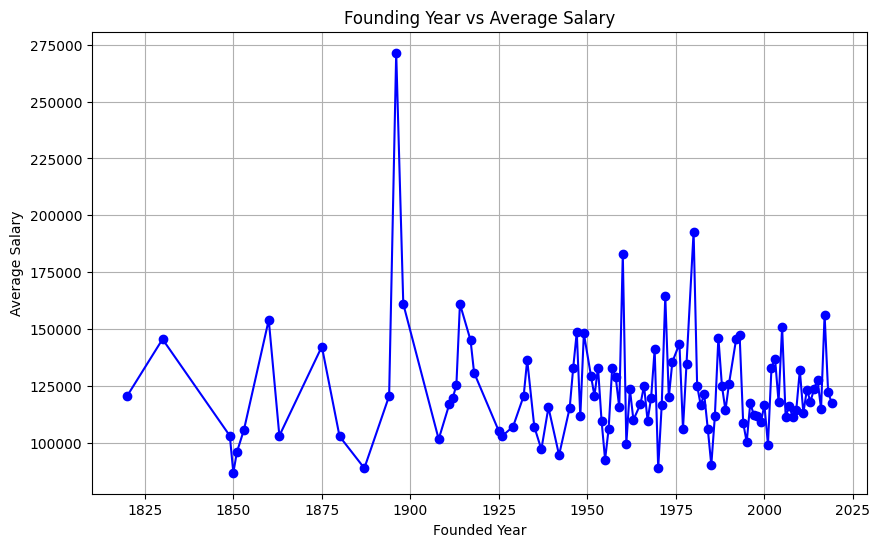

Founding Year vs Average Salary:
    Founded  Average Salary
0    1820.0   120500.000000
1    1830.0   145500.000000
2    1849.0   103000.000000
3    1850.0    86750.000000
4    1851.0    95800.000000
..      ...             ...
95   2015.0   127659.090909
96   2016.0   114833.333333
97   2017.0   156300.000000
98   2018.0   122142.857143
99   2019.0   117500.000000

[100 rows x 2 columns]


In [42]:
# 5. Tricky EDA
'''Founding Year vs. Salary: Analyze if older companies tend to offer higher or lower salaries compared to newer companies.'''

df_cleaned = df_cleaned.dropna(subset=['Founded', 'Average Salary'])

founding_year_salary = df_cleaned.groupby('Founded')['Average Salary'].mean().reset_index()

founding_year_salary_sorted = founding_year_salary.sort_values('Founded')

plt.figure(figsize=(10, 6))
plt.plot(founding_year_salary_sorted['Founded'], founding_year_salary_sorted['Average Salary'], marker='o', color='b')
plt.title('Founding Year vs Average Salary')
plt.xlabel('Founded Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

print("Founding Year vs Average Salary:")
print(founding_year_salary_sorted)


   Remote Work Flag  avg_rating
0             False    3.866042
1              True    3.941429


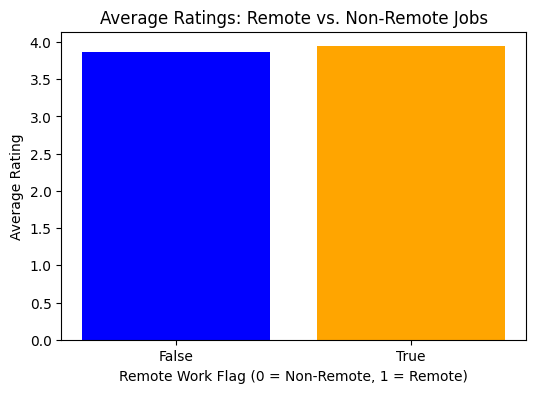

In [43]:
'''Remote Work and Rating: Compare the ratings of jobs marked as remote vs. non-remote to see if remote positions correlate with
 higher ratings.'''

remote_rating_comparison = df_cleaned.groupby('Remote Work Flag').agg(
    avg_rating=('Rating', 'mean')
).reset_index()

print(remote_rating_comparison)

# Plot the comparison
plt.figure(figsize=(6, 4))
plt.bar(remote_rating_comparison['Remote Work Flag'].astype(str), remote_rating_comparison['avg_rating'], color=['blue', 'orange'])
plt.title('Average Ratings: Remote vs. Non-Remote Jobs')
plt.xlabel('Remote Work Flag (0 = Non-Remote, 1 = Remote)')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\822016861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Num Competitors'] = df_cleaned['Competitors'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)


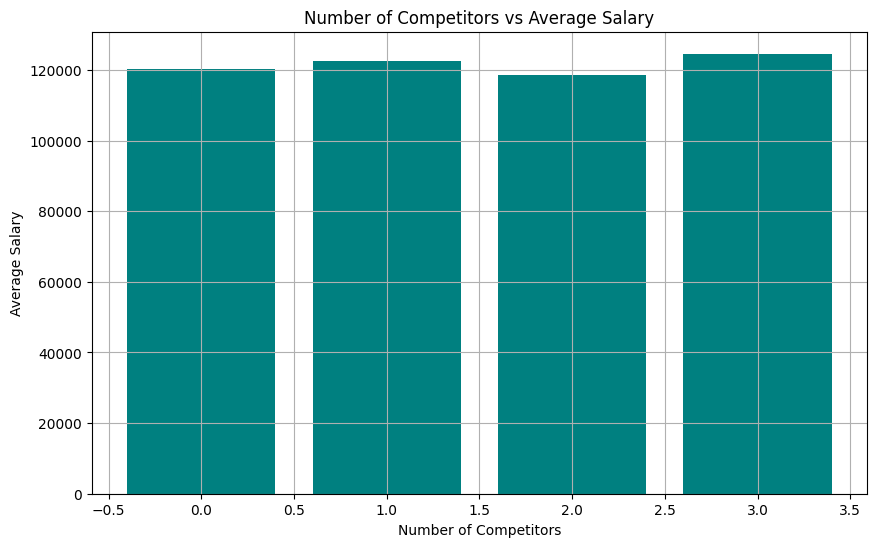

Number of Competitors vs Average Salary:
   Num Competitors  Average Salary
0                0   120259.114583
1                1   122600.000000
2                2   118466.666667
3                3   124602.272727


In [44]:
''' Competitors and Salary: Check if companies with multiple listed competitors tend to offer higher salaries on average'''

df_cleaned['Num Competitors'] = df_cleaned['Competitors'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

competitor_salary = df_cleaned.groupby('Num Competitors')['Average Salary'].mean().reset_index()

competitor_salary_sorted = competitor_salary.sort_values('Num Competitors')

plt.figure(figsize=(10, 6))
plt.bar(competitor_salary_sorted['Num Competitors'], competitor_salary_sorted['Average Salary'], color='teal')
plt.title('Number of Competitors vs Average Salary')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

print("Number of Competitors vs Average Salary:")
print(competitor_salary_sorted)


In [45]:
# 1. Advanced Keyword Tagging
'''Add Skill Flags: Create binary columns to flag if certain skills (e.g., ”Python,” ”SQL,” ”machine learning”) are mentioned in the
 ”Job Description.”'''

skills = ['Python', 'SQL', 'Machine Learning', 'Java', 'Data Analysis', 'MERN', 'Django']

for skill in skills:
    df_cleaned[skill + ' Flag'] = df_cleaned['Cleaned Job Description'].apply(
        lambda x: 1 if isinstance(x, str) and skill.lower() in x.lower() else 0
    )

print(df_cleaned[['Cleaned Job Description'] + [skill + ' Flag' for skill in skills]])


                               Cleaned Job Description  Python Flag  SQL Flag  \
0    description  the senior data scientist is resp...            0         0   
1    secure our nation, ignite your future  join th...            0         1   
2    overview   analysis group is one of the larges...            1         0   
3    job description  do you have a passion for dat...            1         1   
4    data scientist affinity solutions  marketing c...            1         1   
..                                                 ...          ...       ...   
663  job description education and experience at le...            1         1   
665  criterion systems seeks a data scientist to su...            1         1   
666  about foundation medicine  foundation medicine...            1         1   
667  summary  weâre looking for a data scientist to...            1         1   
671  description  the data scientist will be part o...            1         1   

     Machine Learning Flag 

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1400583726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[skill + ' Flag'] = df_cleaned['Cleaned Job Description'].apply(
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1400583726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[skill + ' Flag'] = df_cleaned['Cleaned Job Description'].apply(
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1400583726.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [46]:
'''Identify Benefits: Add columns for common benefits (e.g., ”health care,” ”retirement plan”) based on keywords found in the 
”Job Description.”'''

benefits_keywords = {
    'Health Care': ['health care', 'health insurance', 'medical insurance', 'health plan'],
    'Retirement Plan': ['retirement plan', 'pension', 'retirement'],
    'Vacation': ['vacation', 'paid time off', 'holiday'],
    'Life Insurance': ['life insurance', 'life coverage'],
    'Dental Insurance': ['dental insurance', 'dental plan'],
    'Vision Insurance': ['vision insurance', 'vision plan']
}

def detect_benefit(description, keywords):
    return any(keyword.lower() in description.lower() for keyword in keywords)

for benefit, keywords in benefits_keywords.items():
    df_cleaned[benefit] = df_cleaned['Cleaned Job Description'].apply(lambda x: detect_benefit(x, keywords))

print(df_cleaned)

    Cleaned salary                            Cleaned Job Description  \
0        137K-171K  description  the senior data scientist is resp...   
1        137K-171K  secure our nation, ignite your future  join th...   
2        137K-171K  overview   analysis group is one of the larges...   
3        137K-171K  job description  do you have a passion for dat...   
4        137K-171K  data scientist affinity solutions  marketing c...   
..             ...                                                ...   
663      105K-167K  job description education and experience at le...   
665      105K-167K  criterion systems seeks a data scientist to su...   
666      105K-167K  about foundation medicine  foundation medicine...   
667      105K-167K  summary  weâre looking for a data scientist to...   
671      105K-167K  description  the data scientist will be part o...   

             Job Title               Company Name  \
0    sr data scientist                healthfirst   
1       data scie

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1040638877.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[benefit] = df_cleaned['Cleaned Job Description'].apply(lambda x: detect_benefit(x, keywords))
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1040638877.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[benefit] = df_cleaned['Cleaned Job Description'].apply(lambda x: detect_benefit(x, keywords))
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1040638877.py:17: Set

In [47]:
# 2. Time-Based Transformation
'''Convert Founded Year to Age: Calculate each company’s age by subtracting the founding year from the current year.'''

current_year = datetime.now().year
df_cleaned['Company Age'] = df_cleaned['Founded'].apply(
    lambda x: current_year - x if isinstance(x, float) and x > 0 else None
)

print(df_cleaned[['Company Name', 'Founded', 'Company Age']])


                  Company Name  Founded  Company Age
0                  healthfirst   1993.0         32.0
1                      mantech   1968.0         57.0
2               analysis group   1981.0         44.0
3                      inficon   2000.0         25.0
4           affinity solutions   1998.0         27.0
..                         ...      ...          ...
663  a-line staffing solutions   2004.0         21.0
665    criterion systems, inc.   2005.0         20.0
666        foundation medicine   2010.0         15.0
667                   tranzact   1989.0         36.0
671              1-800-flowers   1976.0         49.0

[551 rows x 3 columns]


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1495666184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company Age'] = df_cleaned['Founded'].apply(


In [48]:
'''Establish Company Age Categories: Categorize companies into age groups (e.g., ”New” for <10 years, ”Established” for 10-50 years,
 ”Legacy” for >50 years)'''

def categorize_company_age(age):
    if age < 10:
        return "New"
    elif 10 <= age <= 50:
        return "Established"
    else:
        return "Legacy"

df_cleaned['Company Age Category'] = df_cleaned['Company Age'].apply(categorize_company_age)

print(df_cleaned[['Company Name', 'Company Age', 'Company Age Category']])

                  Company Name  Company Age Company Age Category
0                  healthfirst         32.0          Established
1                      mantech         57.0               Legacy
2               analysis group         44.0          Established
3                      inficon         25.0          Established
4           affinity solutions         27.0          Established
..                         ...          ...                  ...
663  a-line staffing solutions         21.0          Established
665    criterion systems, inc.         20.0          Established
666        foundation medicine         15.0          Established
667                   tranzact         36.0          Established
671              1-800-flowers         49.0          Established

[551 rows x 3 columns]


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\350760023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company Age Category'] = df_cleaned['Company Age'].apply(categorize_company_age)


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2712390116.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company Size Midpoint'] = df_cleaned['Size Category'].apply(convert_size_to_midpoint)
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2712390116.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_cleaned, x='Type of ownership', y='Company Size Midpoint', palette='Set2')


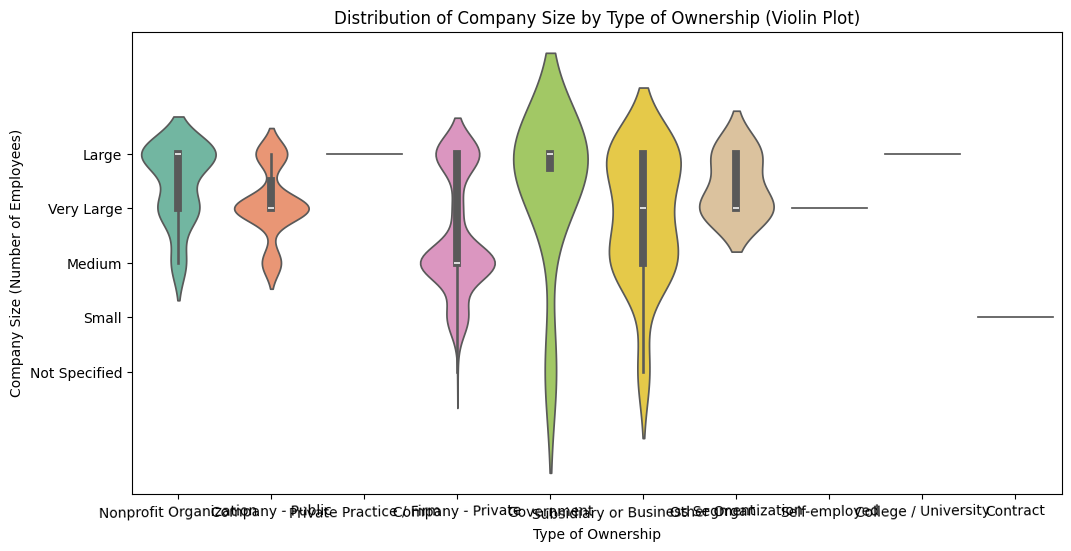

In [49]:
# Visualization
# 1. Basic Visualizations
'''Plotthedistribution of company sizes (in terms of employee numbers) and see how it aligns with ”Type of Ownership” (e.g., private, public,
 nonprofit).'''

def convert_size_to_midpoint(size):
    if isinstance(size, str):
        try:
            # Extract the range (e.g., "1-10") and return the midpoint
            size_range = size.split('-')
            if len(size_range) == 2:
                return (int(size_range[0]) + int(size_range[1])) / 2
        except:
            return None
    return size

df_cleaned['Company Size Midpoint'] = df_cleaned['Size Category'].apply(convert_size_to_midpoint)

plt.figure(figsize=(12, 6))

sns.violinplot(data=df_cleaned, x='Type of ownership', y='Company Size Midpoint', palette='Set2')

plt.title('Distribution of Company Size by Type of Ownership (Violin Plot)')
plt.xlabel('Type of Ownership')
plt.ylabel('Company Size (Number of Employees)')
plt.xticks(rotation = 1)
plt.show()



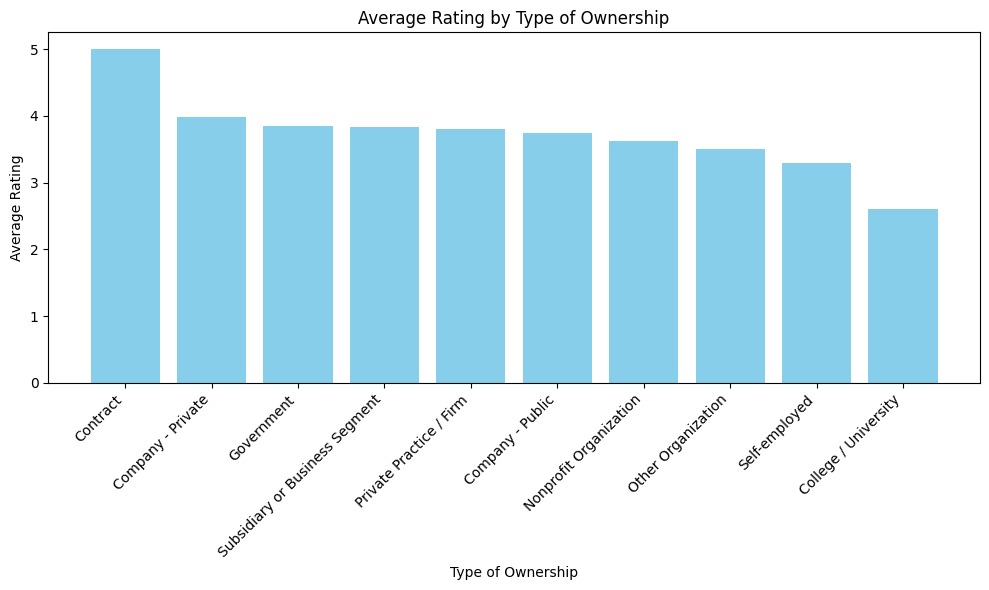

In [50]:
''' Create a bar chart showing the average rating for each ”Type of Ownership” to see if ownership types correlate with employee satisfaction'''

ownership_rating_comparison = df_cleaned.groupby('Type of ownership').agg(
    avg_rating=('Rating', 'mean')
).reset_index()

ownership_rating_comparison = ownership_rating_comparison.sort_values(by='avg_rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(ownership_rating_comparison['Type of ownership'], ownership_rating_comparison['avg_rating'], color='skyblue')

plt.title('Average Rating by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2262020644.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_d')


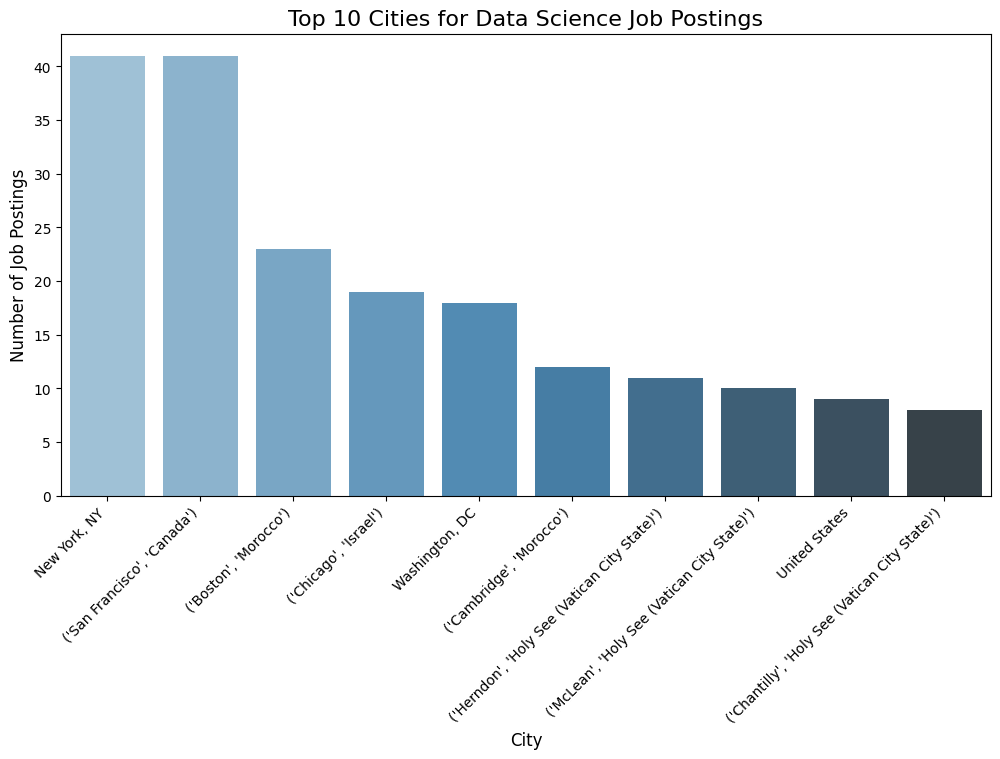

In [51]:
# 2. Location Based Visualizations
'''Generate a bar chart to compare the number of job postings across the top 10 cities, highlighting popular cities for data science roles.'''

data_science_keywords = ['data scientist', 'machine learning', 'data analysis', 'data engineer', 'artificial intelligence']

mask = df_cleaned['Job Title'].str.contains('|'.join(data_science_keywords), case=False, na=False) | \
       df_cleaned['Cleaned Job Description'].str.contains('|'.join(data_science_keywords), case=False, na=False)

data_science_jobs = df_cleaned[mask]

city_counts = data_science_jobs['Expanded Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_d')

# Add title and labels
plt.title('Top 10 Cities for Data Science Job Postings', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')  

plt.show()


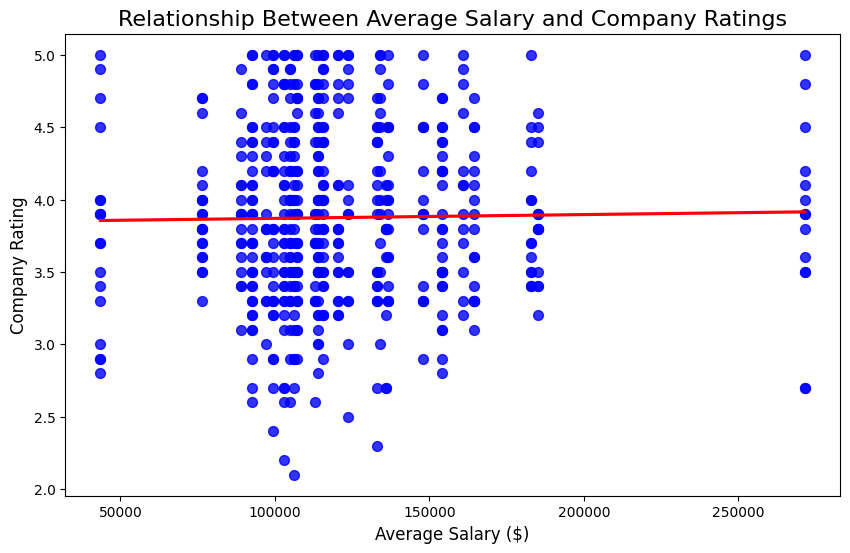

In [52]:
''' Create a scatter plot showing the relationship between average salary range and company ratings, and add a trend line to analyze if higher
rated companies tend to offer higher salaries.'''

filtered_data = df_cleaned.dropna(subset=['Average Salary', 'Rating'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Average Salary', y='Rating', data=filtered_data, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'}, ci=None)

plt.title('Relationship Between Average Salary and Company Ratings', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Company Rating', fontsize=12)

plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\97370410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\97370410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=numerical_columns, inplace=True)


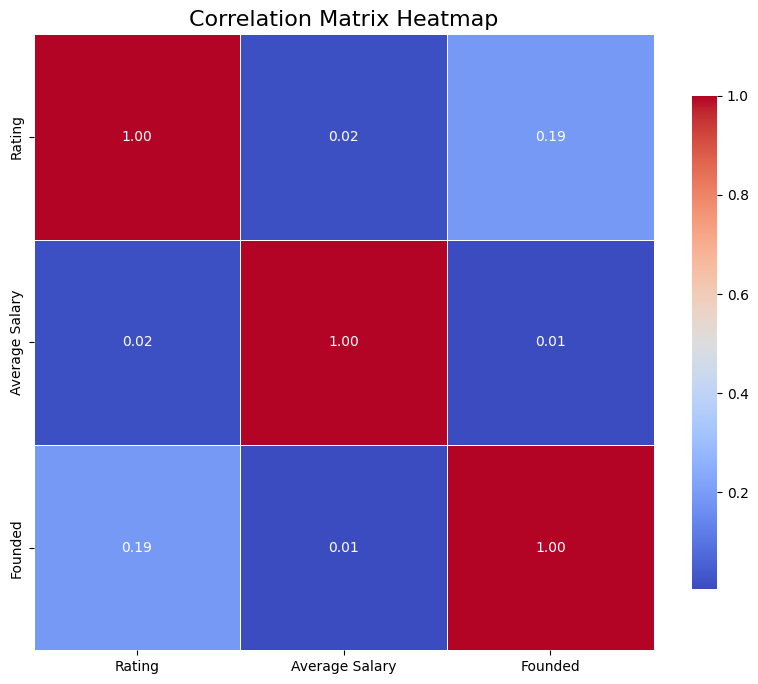

In [53]:
''' Generate a heatmap to visualize the correlation matrix between numerical columns (e.g., ratings, salary estimates, founding year) to
 identify potential relationships.'''
numerical_columns = ['Rating', 'Average Salary', 'Founded']  

df_cleaned[numerical_columns] = df_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')

df_cleaned.dropna(subset=numerical_columns, inplace=True)

corr_matrix = df_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1005353093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Decade'] = (df_cleaned['Founded'] // 10) * 10  # Round down to nearest decade


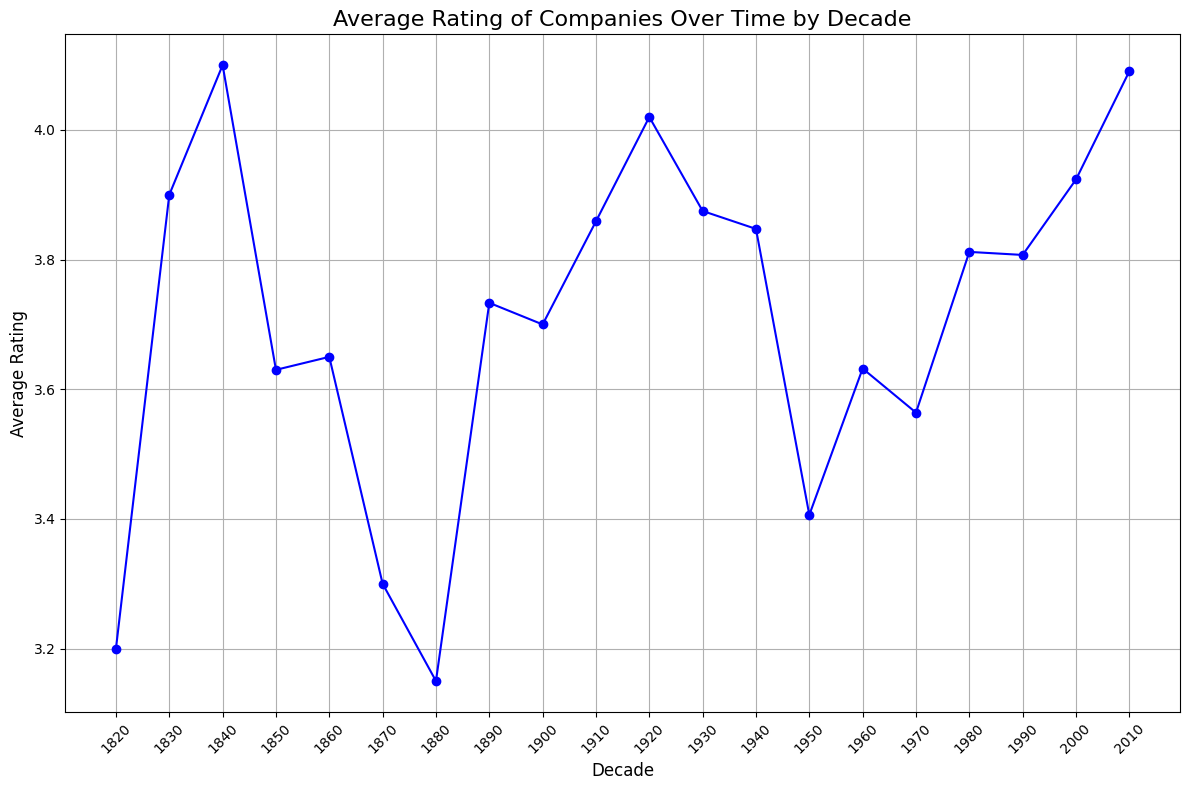

In [54]:
''' Plot a line graph of the average rating of companies over time by ”Founded Year” to see if there’s a trend in ratings for companies
 founded in different decades.'''

df_cleaned['Decade'] = (df_cleaned['Founded'] // 10) * 10  # Round down to nearest decade

avg_rating_by_decade = df_cleaned.groupby('Decade')['Rating'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(avg_rating_by_decade['Decade'], avg_rating_by_decade['Rating'], marker='o', linestyle='-', color='b')

plt.title('Average Rating of Companies Over Time by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(avg_rating_by_decade['Decade'], rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3202640536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Lower Salary'] = pd.to_numeric(df_cleaned['Lower Salary'], errors='coerce')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3202640536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Upper Salary'] = pd.to_numeric(df_cleaned['Upper Salary'], errors='coerce')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3202640536.py:6: SettingWithCopyWarning: 
A value is tryi

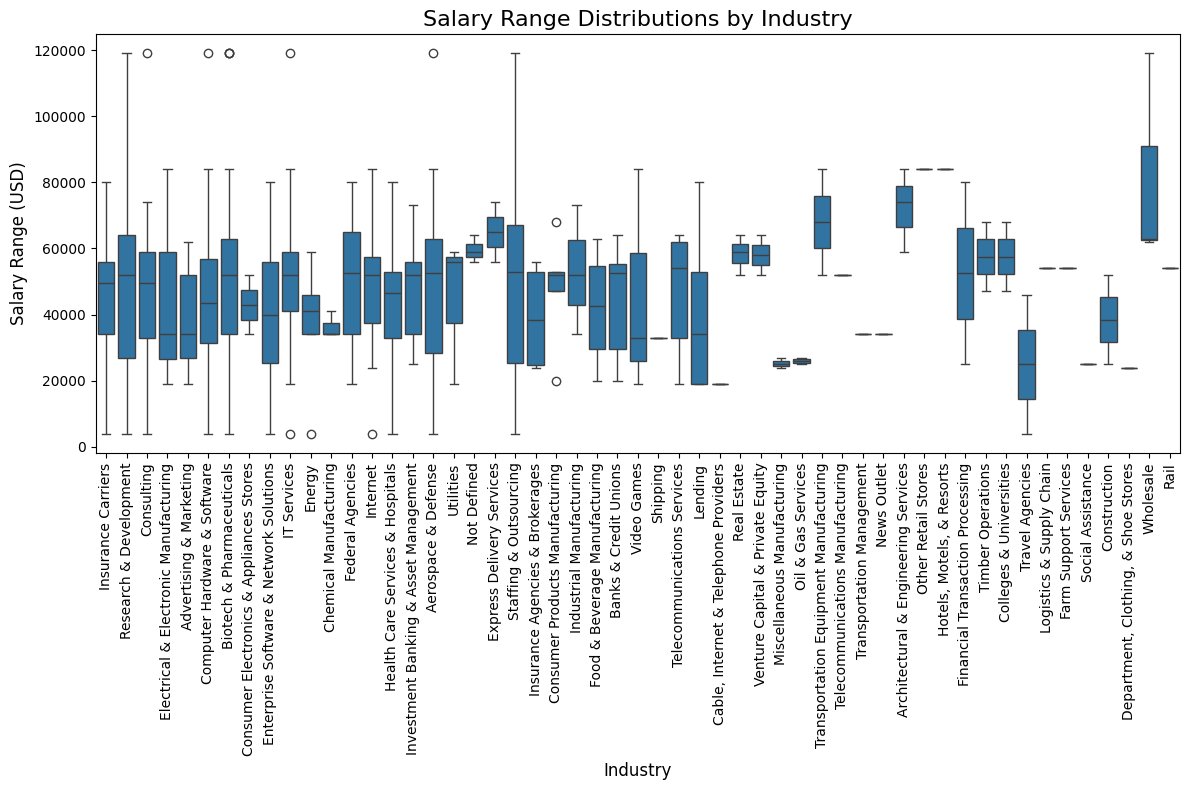

In [55]:
'''Create a box plot showing the salary range distributions by industry, highlighting which industries have the widest salary range.'''

df_cleaned['Lower Salary'] = pd.to_numeric(df_cleaned['Lower Salary'], errors='coerce')
df_cleaned['Upper Salary'] = pd.to_numeric(df_cleaned['Upper Salary'], errors='coerce')

df_cleaned['Salary Range'] = df_cleaned['Upper Salary'] - df_cleaned['Lower Salary']

plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry', y='Salary Range', data=df_cleaned)

# Step 4: Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Step 5: Add labels and title
plt.title('Salary Range Distributions by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Salary Range (USD)', fontsize=12)

# Step 6: Show the plot
plt.tight_layout()
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1451842706.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


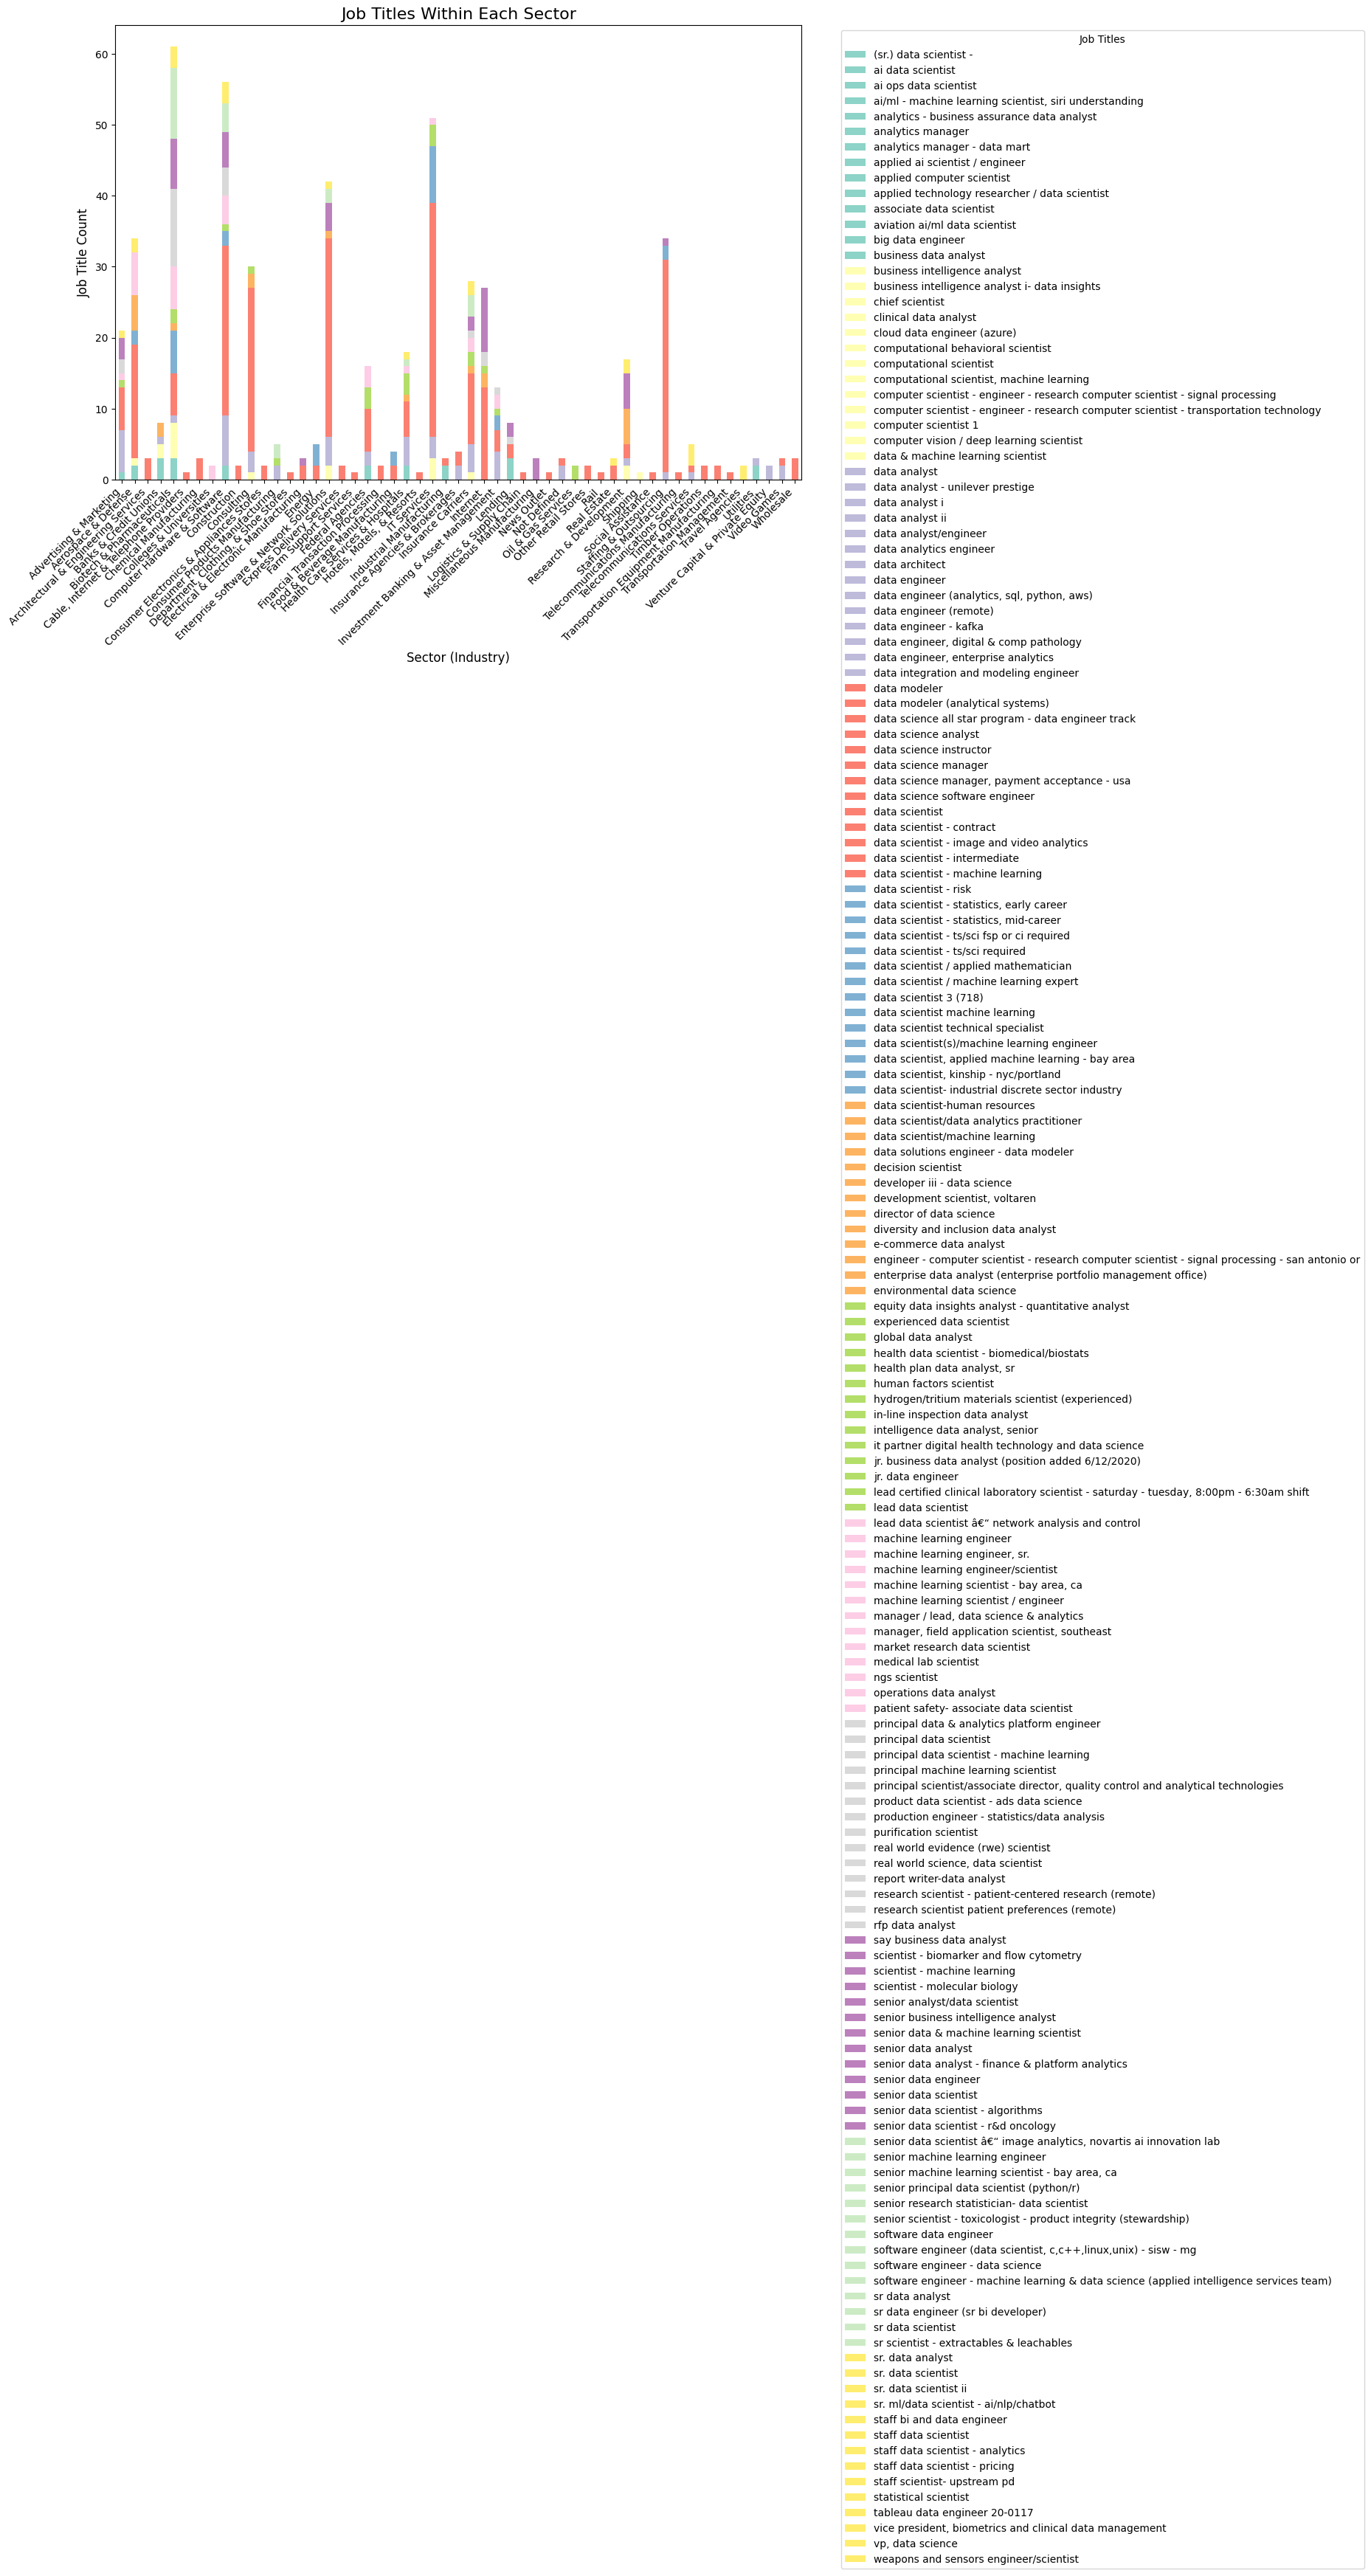

In [56]:
'''Generate a stacked bar chart of job titles within each sector to observe which titles are most common in different industries.'''

job_title_counts = df_cleaned.groupby(['Industry', 'Job Title']).size().unstack(fill_value=0)

job_title_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set3')

plt.title('Job Titles Within Each Sector', fontsize=16)
plt.xlabel('Sector (Industry)', fontsize=12)
plt.ylabel('Job Title Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Job Titles', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


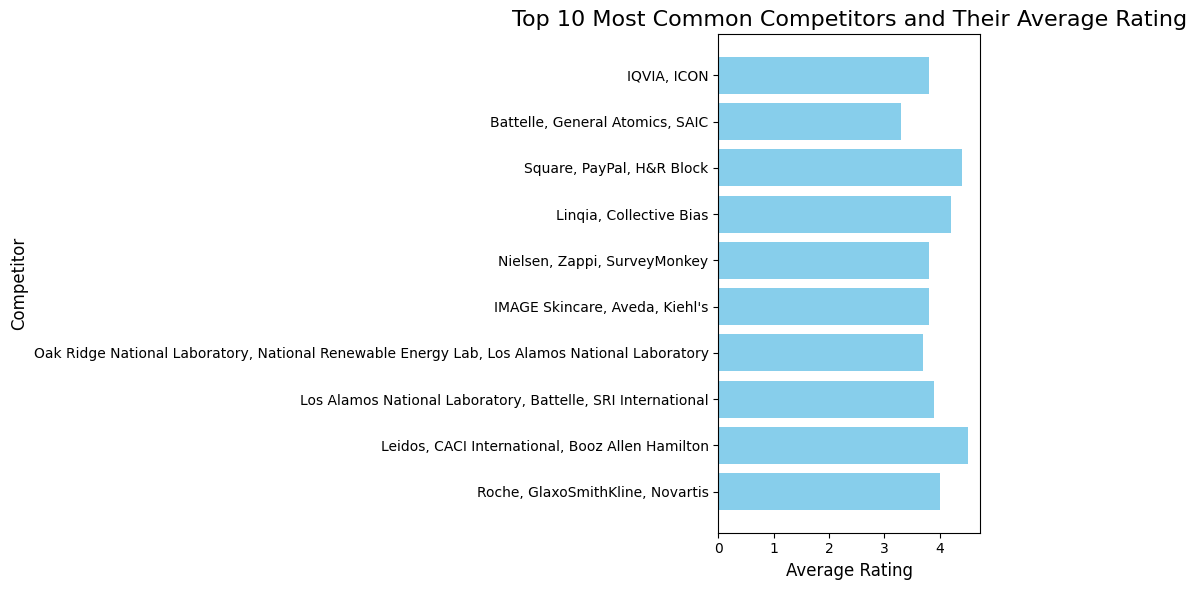

In [57]:
''' Plot a bar chart showing the top 10 most common competitors listed, along with the average rating of companies 
that have these competitors.'''

competitor_avg_rating = df_cleaned.groupby('Competitors')['Rating'].mean().reset_index()

competitor_count = df_cleaned['Competitors'].value_counts().reset_index()
competitor_count.columns = ['Competitors', 'Count']

competitor_info = pd.merge(competitor_count, competitor_avg_rating, on='Competitors')

top_10_competitors = competitor_info.sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_competitors['Competitors'], top_10_competitors['Rating'], color='skyblue')

plt.title('Top 10 Most Common Competitors and Their Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Competitor', fontsize=12)
plt.tight_layout()  

plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2599029753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Founded'] = pd.to_numeric(df_cleaned['Founded'], errors='coerce')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2599029753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Size'] = df_cleaned['Size'].fillna('Unknown')  # Handle missing values


<Figure size 1400x800 with 0 Axes>

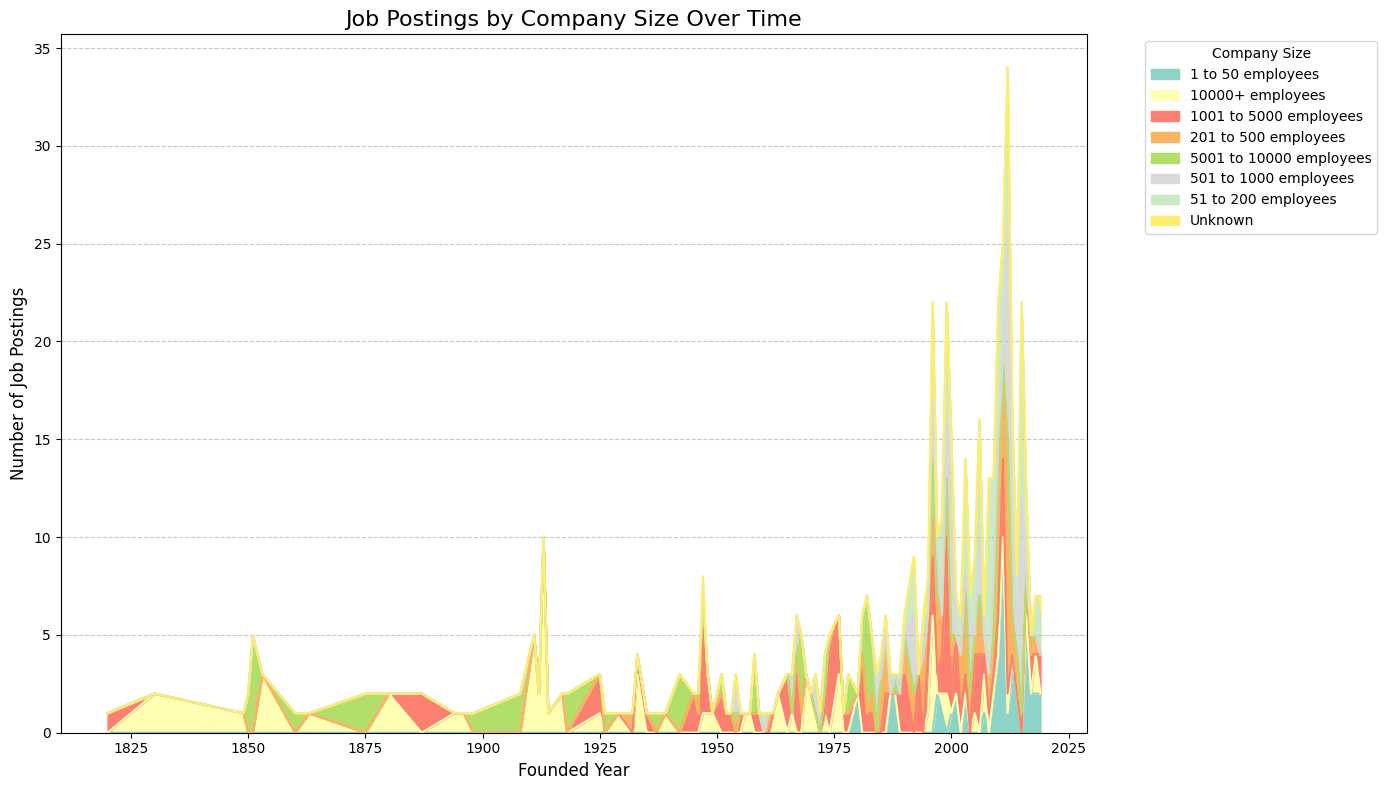

In [58]:
'''Create a stacked area chart to show how job postings by company size (”Size”) are distributed over time (based on ”Founded Year”).'''

df_cleaned['Founded'] = pd.to_numeric(df_cleaned['Founded'], errors='coerce')
df_cleaned['Size'] = df_cleaned['Size'].fillna('Unknown')  # Handle missing values

grouped_data = df_cleaned.groupby(['Founded', 'Size']).size().reset_index(name='Job Postings')

pivot_data = grouped_data.pivot_table(index='Founded', columns='Size', values='Job Postings', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
pivot_data.plot(kind='area', stacked=True, figsize=(14, 8), colormap='Set3')

plt.title('Job Postings by Company Size Over Time', fontsize=16)
plt.xlabel('Founded Year', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()


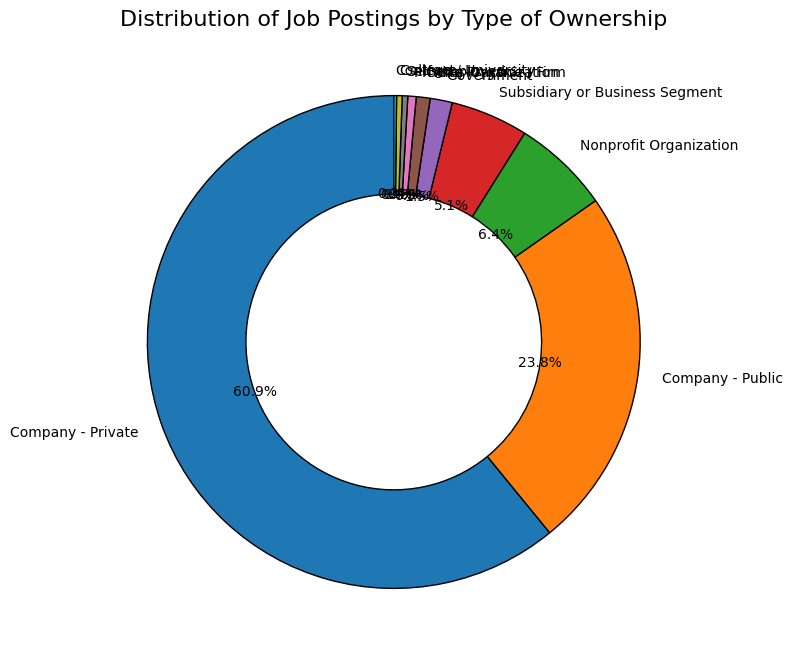

In [59]:
'''Plot a donut chart representing the distribution of job postings by ”Type of Ownership” 
to visualize how job availability varies by ownership type.'''

ownership_counts = df_cleaned['Type of ownership'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=90, 
        wedgeprops={'width': 0.4, 'edgecolor': 'black'})

plt.title('Distribution of Job Postings by Type of Ownership', fontsize=16)

plt.show()

In [60]:
# 3. Categorization and Grouping
''' Sector and Industry Mapping: Create a mapping dictionary to reclassify ”Industry” values into broader ”Sector” categories if needed.'''

industry_to_sector_mapping = {
    'Insurance Carriers': 'Financial Services',
    'Research & Development': 'Research & Development',
    'Consulting': 'Professional Services',
    'Electrical & Electronic Manufacturing': 'Manufacturing & Industrial',
    'Advertising & Marketing': 'Marketing & Advertising',
    'Computer Hardware & Software': 'Technology',
    'Biotech & Pharmaceuticals': 'Health & Social Care',
    'Consumer Electronics & Appliances Stores': 'Retail & Consumer Services',
    'Enterprise Software & Network Solutions': 'Technology',
    'IT Services': 'Technology',
    'Energy': 'Energy & Utilities',
    'Chemical Manufacturing': 'Manufacturing & Industrial',
    'Federal Agencies': 'Government & Public Sector',
    'Internet': 'Technology',
    'Health Care Services & Hospitals': 'Health & Social Care',
    'Investment Banking & Asset Management': 'Financial Services',
    'Aerospace & Defense': 'Manufacturing & Industrial',
    'Utilities': 'Energy & Utilities',
    'Express Delivery Services': 'Logistics & Transportation',
    'Staffing & Outsourcing': 'Human Resources & Staffing',
    'Insurance Agencies & Brokerages': 'Financial Services',
    'Consumer Products Manufacturing': 'Manufacturing & Industrial',
    'Industrial Manufacturing': 'Manufacturing & Industrial',
    'Food & Beverage Manufacturing': 'Manufacturing & Industrial',
    'Banks & Credit Unions': 'Financial Services',
    'Video Games': 'Media & Entertainment',
    'Shipping': 'Logistics & Transportation',
    'Telecommunications Services': 'Telecommunications',
    'Lending': 'Financial Services',
    'Cable, Internet & Telephone Providers': 'Telecommunications',
    'Real Estate': 'Real Estate & Construction',
    'Venture Capital & Private Equity': 'Financial Services',
    'Miscellaneous Manufacturing': 'Manufacturing & Industrial',
    'Oil & Gas Services': 'Energy & Utilities',
    'Transportation Equipment Manufacturing': 'Manufacturing & Industrial',
    'Telecommunications Manufacturing': 'Telecommunications',
    'Transportation Management': 'Logistics & Transportation',
    'News Outlet': 'Media & Entertainment',
    'Architectural & Engineering Services': 'Professional Services',
    'Food & Beverage Stores': 'Retail & Consumer Services',
    'Other Retail Stores': 'Retail & Consumer Services',
    'Hotels, Motels, & Resorts': 'Hospitality & Tourism',
    'State & Regional Agencies': 'Government & Public Sector',
    'Financial Transaction Processing': 'Financial Services',
    'Timber Operations': 'Manufacturing & Industrial',
    'Colleges & Universities': 'Education & Training',
    'Travel Agencies': 'Hospitality & Tourism',
    'Accounting': 'Professional Services',
    'Logistics & Supply Chain': 'Logistics & Transportation',
    'Farm Support Services': 'Agriculture & Farming',
    'Social Assistance': 'Health & Social Care',
    'Construction': 'Real Estate & Construction',
    'Department, Clothing, & Shoe Stores': 'Retail & Consumer Services',
    'Publishing': 'Media & Entertainment',
    'Health, Beauty, & Fitness': 'Health & Social Care',
    'Wholesale': 'Wholesale & Distribution',
    'Rail': 'Logistics & Transportation'
}

def map_industry_to_sector(industry, mapping_dict):
    """
    This function maps the industry to its corresponding broader sector.
    
    Args:
        industry (str): The industry to be mapped.
        mapping_dict (dict): The dictionary used for mapping industries to sectors.
        
    Returns:
        str: The broader sector category or 'Unknown' if the industry is not in the mapping.
    """
    return mapping_dict.get(industry, 'Unknown')

df_cleaned['Sector'] = df_cleaned['Industry'].apply(lambda x: map_industry_to_sector(x, industry_to_sector_mapping))

print(df_cleaned[['Industry', 'Sector']].head())

                                Industry                      Sector
0                     Insurance Carriers          Financial Services
1                 Research & Development      Research & Development
2                             Consulting       Professional Services
3  Electrical & Electronic Manufacturing  Manufacturing & Industrial
4                Advertising & Marketing     Marketing & Advertising


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\797330109.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sector'] = df_cleaned['Industry'].apply(lambda x: map_industry_to_sector(x, industry_to_sector_mapping))


In [61]:
'''Company Size Bucketing: Create buckets for company size (e.g., ”Small” for <500 employees, ”Medium” for 500-5000, 
        ”Large” for >5000) and add a new column.'''

company_size_distribution = df_cleaned['Company Size Midpoint'].value_counts()
print(company_size_distribution)

Company Size Midpoint
Medium           201
Large            175
Very Large       123
Small             47
Not Specified      4
Name: count, dtype: int64


In [62]:
'''Create Salary Range Buckets: Classify salary ranges into brackets (e.g., ”<$50k,” ”$50k-$100k,” ”>$100k”) to enable clearer comparisons.'''

def classify_salary_range(average_salary):
    try:
        if pd.notna(average_salary):
            if average_salary < 50000:
                return "<$50k"
            elif 50000 <= average_salary <= 100000:
                return "$50k-$100k"
            else:
                return ">$100k"
    except Exception as e:
        print(f"Error in classifying salary range: {e}")
        return "Unknown"  # In case of error, return 'Unknown'

# Apply the function to create the 'Salary Range' column
df_cleaned['Salary Range'] = df_cleaned['Average Salary'].apply(classify_salary_range)

# Check the result
print(df_cleaned[['Company Name', 'Average Salary', 'Salary Range']])

                  Company Name  Average Salary Salary Range
0                  healthfirst        154000.0       >$100k
1                      mantech        154000.0       >$100k
2               analysis group        154000.0       >$100k
3                      inficon        154000.0       >$100k
4           affinity solutions        154000.0       >$100k
..                         ...             ...          ...
663  a-line staffing solutions        136000.0       >$100k
665    criterion systems, inc.        136000.0       >$100k
666        foundation medicine        136000.0       >$100k
667                   tranzact        136000.0       >$100k
671              1-800-flowers        136000.0       >$100k

[550 rows x 3 columns]


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\573807649.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Salary Range'] = df_cleaned['Average Salary'].apply(classify_salary_range)


In [63]:
'''Frequent Competitors: Add a flag for companies that list commonly seen competitors and analyze if these companies have different
 rating or salary trends.'''

competitor_counts = df_cleaned['Competitors'].dropna().apply(lambda x: x.split(',')).explode().value_counts()

threshold = 5
frequent_competitors = competitor_counts[competitor_counts > threshold].index.tolist()

def flag_frequent_competitors(competitors):
    if isinstance(competitors, str):
        competitor_list = competitors.split(',')
        if any(competitor.strip() in frequent_competitors for competitor in competitor_list):
            return 1 
    return 0  

df_cleaned['Frequent Competitor Flag'] = df_cleaned['Competitors'].apply(flag_frequent_competitors)

frequent_competitor_analysis = df_cleaned.groupby('Frequent Competitor Flag').agg(
    avg_rating=('Rating', 'mean'),
    avg_salary=('Average Salary', 'mean')
).reset_index()

print(frequent_competitor_analysis)


   Frequent Competitor Flag  avg_rating     avg_salary
0                         0    3.864615  120584.615385
1                         1    4.066667  130966.666667


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3681625957.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Frequent Competitor Flag'] = df_cleaned['Competitors'].apply(flag_frequent_competitors)


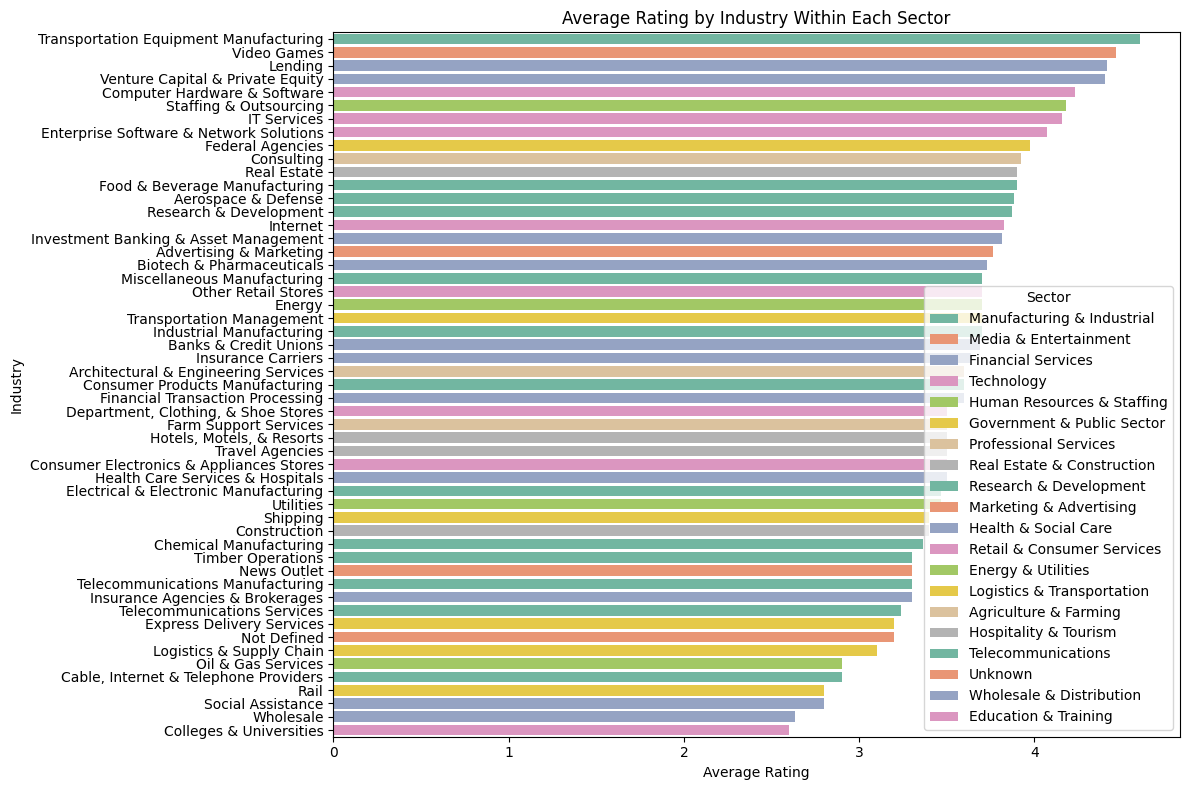

In [64]:
# Comparative Analysis
# 1. Sector vs Industry Comparision
'''Rating Comparison: Compare the average rating across industries within each sector to see if certain industries outperform others within
 the same sector.'''

sector_industry_rating = df_cleaned.groupby(['Sector', 'Industry'])['Rating'].mean().reset_index()

sector_industry_rating_sorted = sector_industry_rating.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Industry', hue='Sector', data=sector_industry_rating_sorted, palette='Set2')
plt.title('Average Rating by Industry Within Each Sector')
plt.xlabel('Average Rating')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\3821432696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type of ownership', y='Average Salary', data=ownership_salary_comparison, palette='Set2')


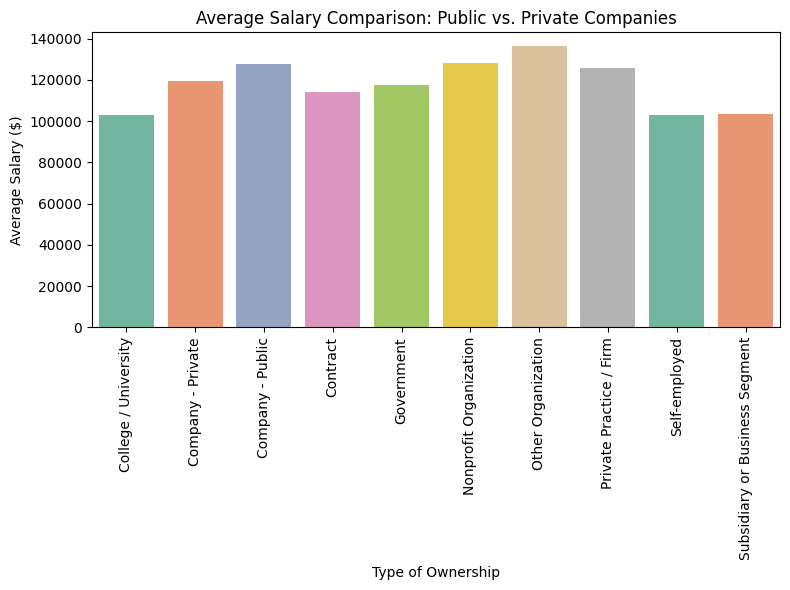

In [65]:
# 2. Ownership Type Analysis
'''Public vs. Private Salary Comparison: Compare average salaries between public and private companies.'''

ownership_salary_comparison = df_cleaned.groupby('Type of ownership')['Average Salary'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Type of ownership', y='Average Salary', data=ownership_salary_comparison, palette='Set2')
plt.title('Average Salary Comparison: Public vs. Private Companies')
plt.xticks(rotation = 90)
plt.xlabel('Type of Ownership')
plt.ylabel('Average Salary ($)')
plt.tight_layout()
plt.show()



C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2742993047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of ownership', y='Rating', data=df_cleaned, palette='Set2')


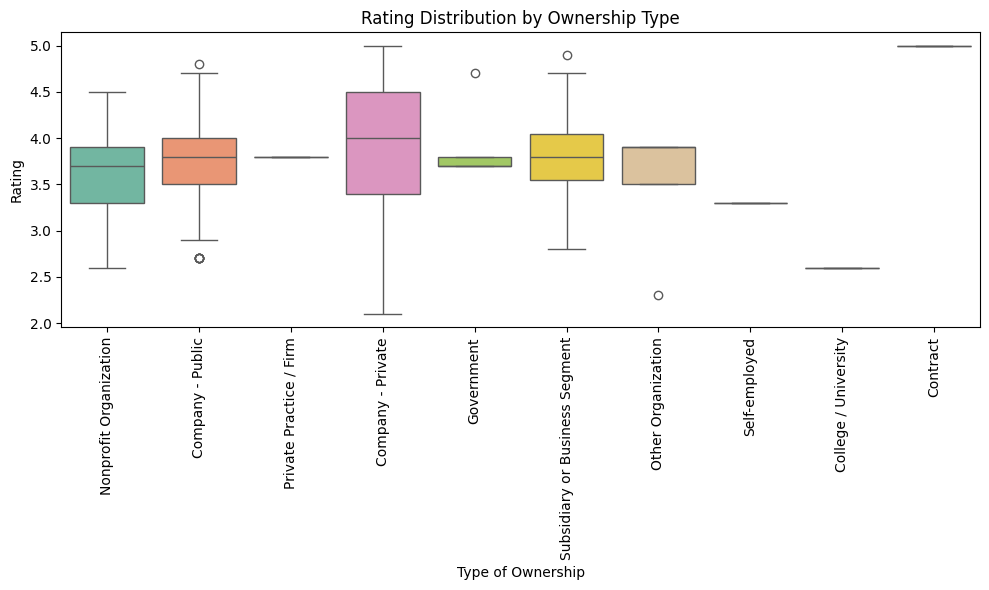

In [66]:
'''Rating Distribution by Ownership: Compare rating distributions across different ownership types to see if public or nonprofit
 organizations have higher ratings.'''

plt.figure(figsize=(10, 6))

sns.boxplot(x='Type of ownership', y='Rating', data=df_cleaned, palette='Set2')

plt.title('Rating Distribution by Ownership Type')
plt.xlabel('Type of Ownership')
plt.xticks(rotation = 90)
plt.ylabel('Rating')
plt.tight_layout()

plt.show()

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2438908060.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Company Size Midpoint'] = df_cleaned['Size'].apply(convert_size_to_midpoint)
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2438908060.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type of ownership', y='Company Size Midpoint', data=df_cleaned, palette='Set2')


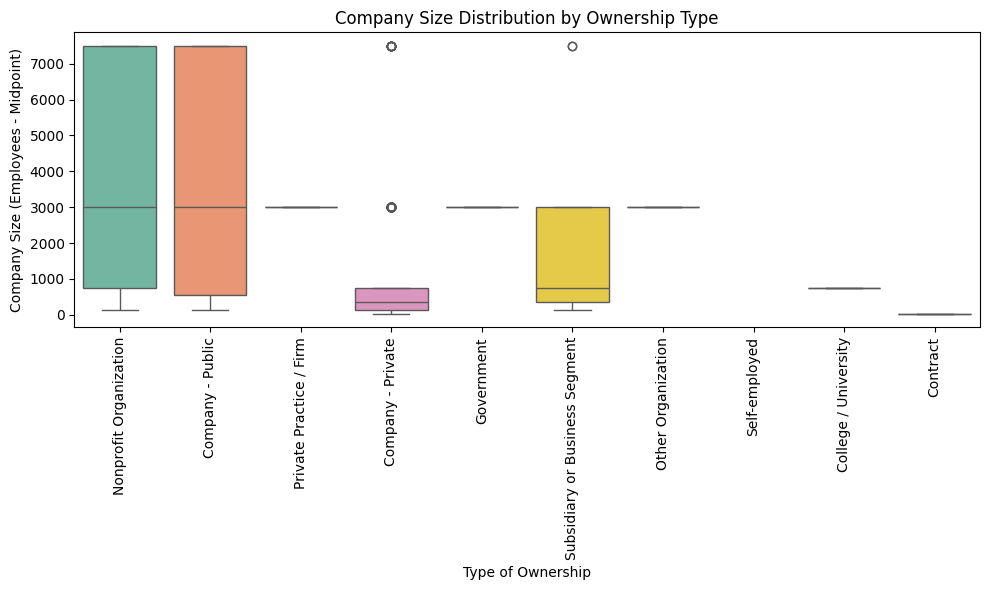

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2438908060.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type of ownership', y='Company Size Midpoint', data=ownership_avg_size, palette='Set2')


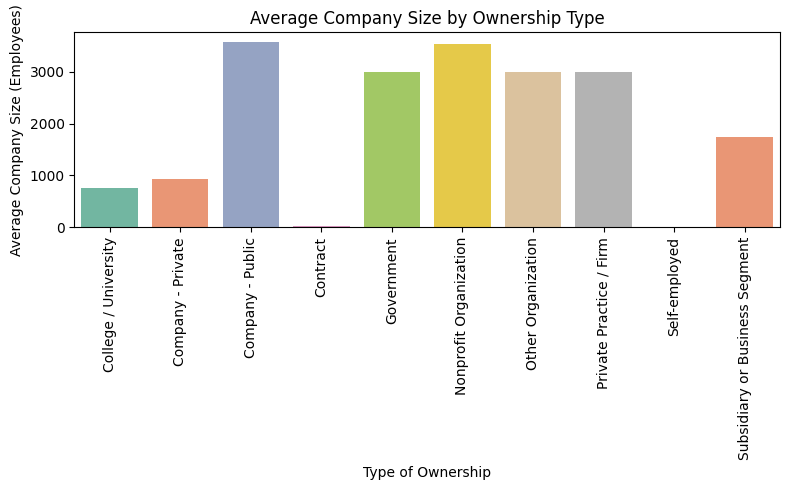

In [67]:
''' Company Size by Ownership: Analyze if public or private companies tend to be larger or smaller in terms of employee size.'''

def convert_size_to_midpoint(size_str):
    if isinstance(size_str, str):
        try:
            size_range = size_str.split('to')
            if len(size_range) == 2:
                min_size = int(size_range[0].strip().split()[0])
                max_size = int(size_range[1].strip().split()[0])
                return (min_size + max_size) / 2
        except Exception as e:
            return None
    return None

df_cleaned['Company Size Midpoint'] = df_cleaned['Size'].apply(convert_size_to_midpoint)

plt.figure(figsize=(10, 6))

sns.boxplot(x='Type of ownership', y='Company Size Midpoint', data=df_cleaned, palette='Set2')

plt.title('Company Size Distribution by Ownership Type')
plt.xlabel('Type of Ownership')
plt.xticks(rotation = 90)
plt.ylabel('Company Size (Employees - Midpoint)')
plt.tight_layout()

plt.show()

ownership_avg_size = df_cleaned.groupby('Type of ownership')['Company Size Midpoint'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Type of ownership', y='Company Size Midpoint', data=ownership_avg_size, palette='Set2')

plt.title('Average Company Size by Ownership Type')
plt.xlabel('Type of Ownership')
plt.xticks(rotation = 90)
plt.ylabel('Average Company Size (Employees)')
plt.tight_layout()

plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1759417879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company Age Category', y='Rating', data=age_group_rating, palette='Set2')


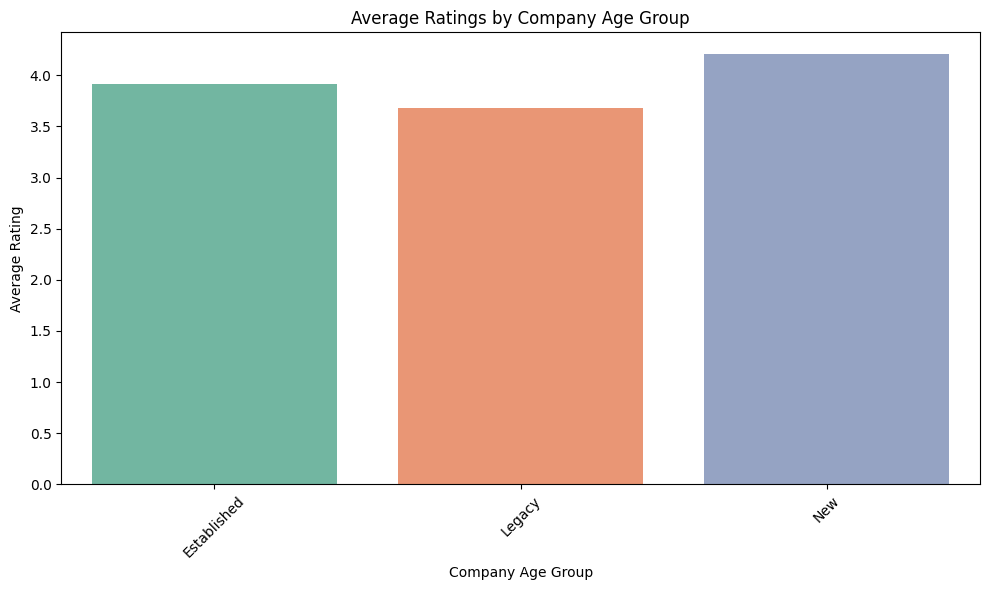

In [68]:
'''Compare Ratings by Age Group: Analyze average ratings of companies in each age group to see if older companies have higher
                    ratings.'''

age_group_rating = df_cleaned.groupby('Company Age Category')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Company Age Category', y='Rating', data=age_group_rating, palette='Set2')

plt.title('Average Ratings by Company Age Group')
plt.xlabel('Company Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1613641395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Founded Before 2000'] = df_cleaned['Founded'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1613641395.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Founded Before 2000', y='Rating', data=rating_variability, palette='Set1')


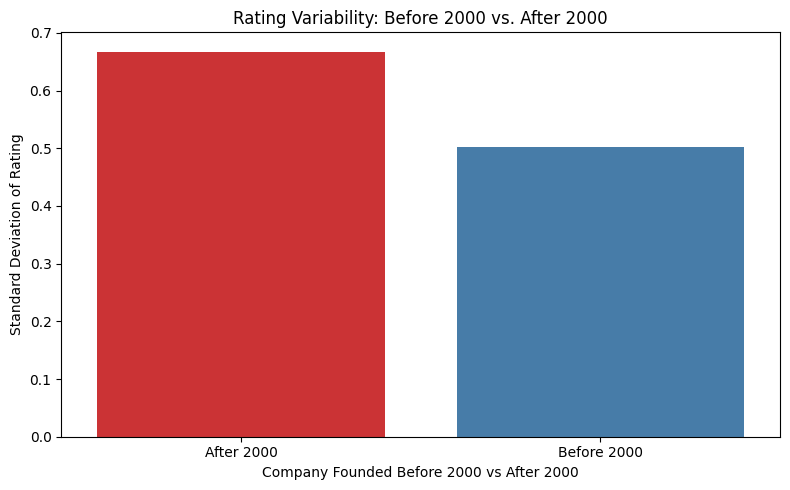

In [69]:
'''Rating Stability Over Time: Examine if companies founded before 2000 have more consistent (less variable) ratings than newer
            companies.'''

df_cleaned['Founded Before 2000'] = df_cleaned['Founded'].apply(lambda x: 'Before 2000' if x < 2000 else 'After 2000')

rating_variability = df_cleaned.groupby('Founded Before 2000')['Rating'].std().reset_index()

plt.figure(figsize=(8, 5))

sns.barplot(x='Founded Before 2000', y='Rating', data=rating_variability, palette='Set1')

plt.title('Rating Variability: Before 2000 vs. After 2000')
plt.xlabel('Company Founded Before 2000 vs After 2000')
plt.ylabel('Standard Deviation of Rating')
plt.tight_layout()

plt.show()


C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\1553919714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age Group'] = df_cleaned['Founded'].apply(lambda x: 'Older' if x < 2000 else 'Newer')


<Figure size 1200x800 with 0 Axes>

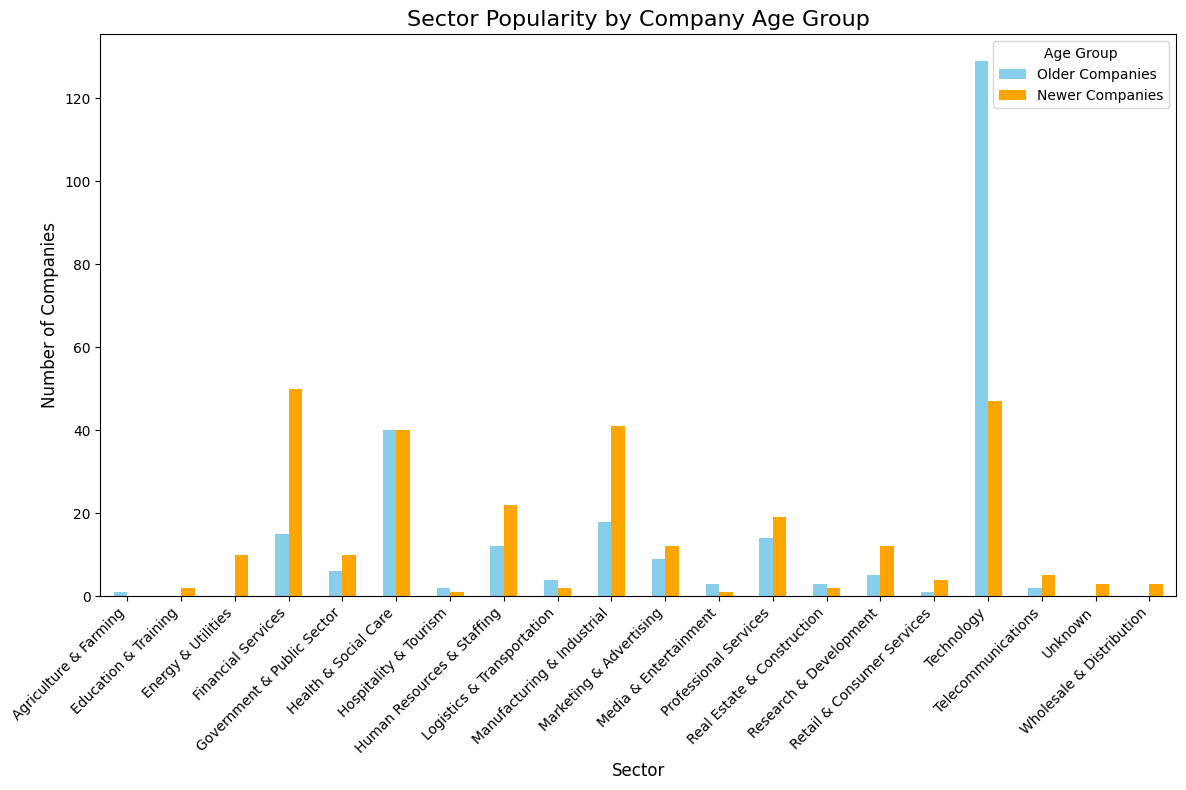

In [70]:
'''Sector Popularity by Age: Compare the prevalence of different sectors within each age group, observing which sectors are popular
 among older vs. newer companies.'''

df_cleaned['Age Group'] = df_cleaned['Founded'].apply(lambda x: 'Older' if x < 2000 else 'Newer')

sector_age_group_count = df_cleaned.groupby(['Age Group', 'Sector'])['Company Name'].count().reset_index(name='Company Count')

sector_pivot = sector_age_group_count.pivot(index='Sector', columns='Age Group', values='Company Count').fillna(0)

plt.figure(figsize=(12, 8))

sector_pivot.plot(kind='bar', stacked=False, color=['skyblue', 'orange'], figsize=(12, 8))

plt.title('Sector Popularity by Company Age Group', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', labels=['Older Companies', 'Newer Companies'])

plt.tight_layout()
plt.show()

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\157890892.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Remote Work Flag', y='avg_salary', data=remote_comparison, ax=axes[0], palette='Blues')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\157890892.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Remote Work Flag', y='job_count', data=remote_comparison, ax=axes[1], palette='Oranges')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\157890892.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Remote Work Flag', 

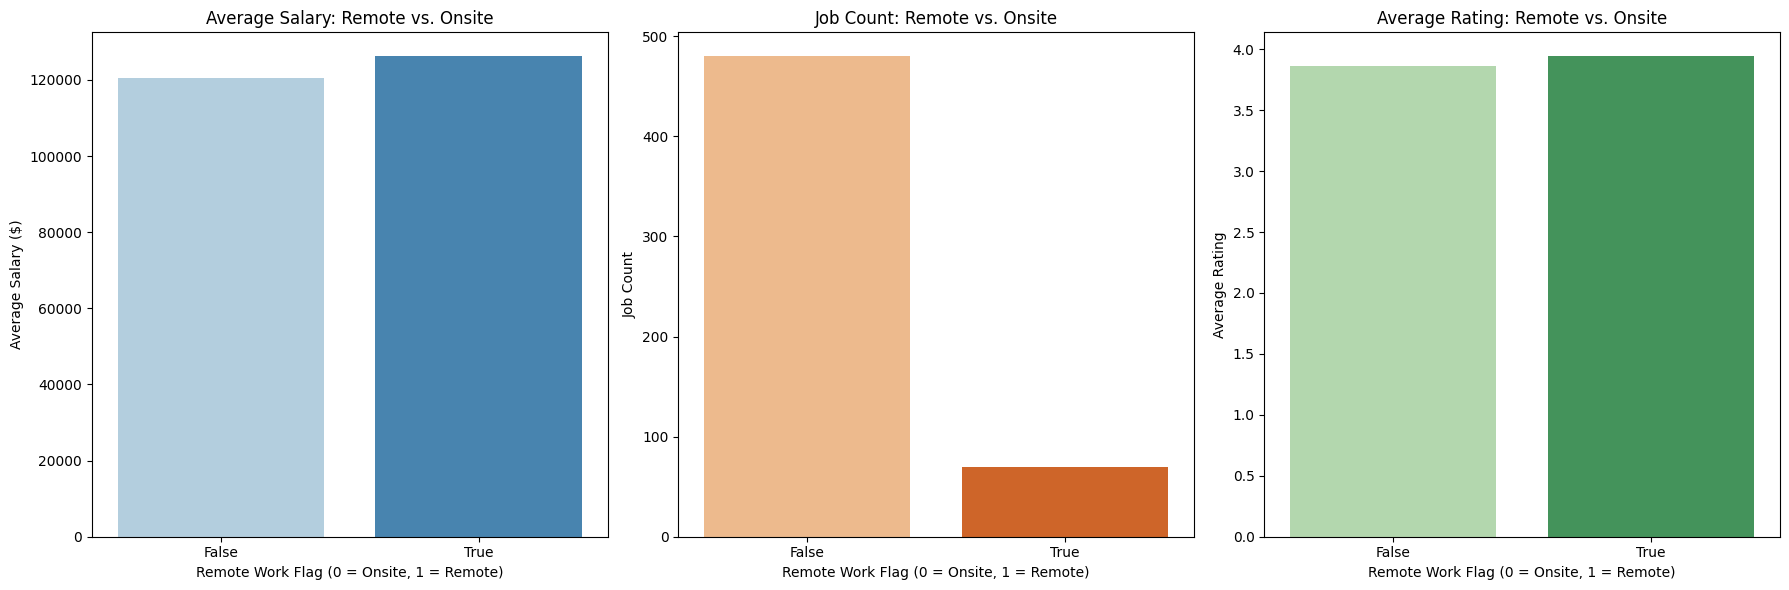

In [71]:
''' Remote vs. Onsite Roles: Compare salary ranges, job counts, and ratings for remote vs. onsite positions.'''

remote_comparison = df_cleaned.groupby('Remote Work Flag').agg(
    avg_salary=('Average Salary', 'mean'),
    job_count=('Job Title', 'count'),
    avg_rating=('Rating', 'mean')
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Remote Work Flag', y='avg_salary', data=remote_comparison, ax=axes[0], palette='Blues')
axes[0].set_title('Average Salary: Remote vs. Onsite')
axes[0].set_xlabel('Remote Work Flag (0 = Onsite, 1 = Remote)')
axes[0].set_ylabel('Average Salary ($)')

sns.barplot(x='Remote Work Flag', y='job_count', data=remote_comparison, ax=axes[1], palette='Oranges')
axes[1].set_title('Job Count: Remote vs. Onsite')
axes[1].set_xlabel('Remote Work Flag (0 = Onsite, 1 = Remote)')
axes[1].set_ylabel('Job Count')

sns.barplot(x='Remote Work Flag', y='avg_rating', data=remote_comparison, ax=axes[2], palette='Greens')
axes[2].set_title('Average Rating: Remote vs. Onsite')
axes[2].set_xlabel('Remote Work Flag (0 = Onsite, 1 = Remote)')
axes[2].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()

C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2782849232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['State'] = df_cleaned['Expanded Location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else None)
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2782849232.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_count', y='State', data=state_salary_comparison_sorted, ax=axes[0], palette='Blues')
C:\Users\Admin-\AppData\Local\Temp\ipykernel_15712\2782849232.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

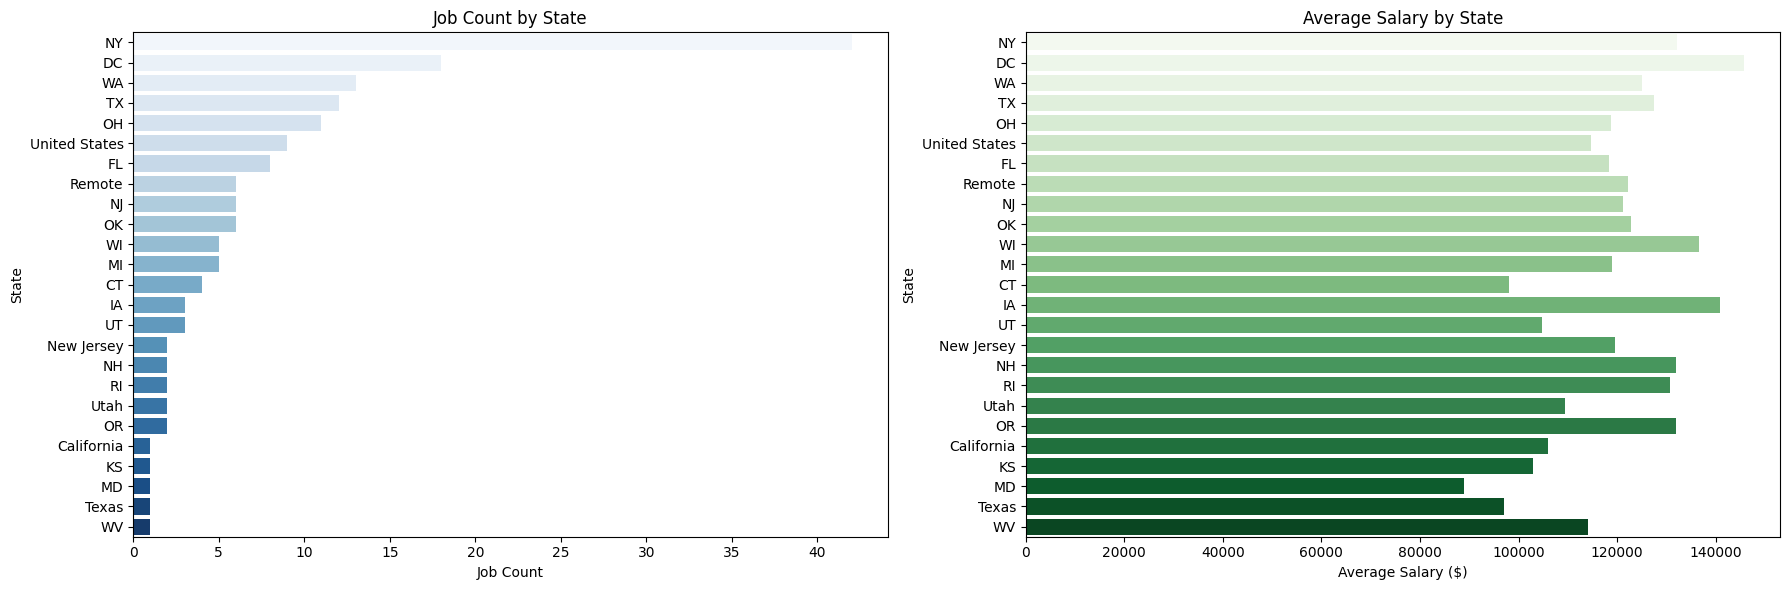

In [72]:
'''Job Count by State: Compare the total job count and average salary for each state to identify states with the highest job availability.'''

df_cleaned['State'] = df_cleaned['Expanded Location'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else None)

state_salary_comparison = df_cleaned.groupby('State').agg(
    job_count=('Job Title', 'count'),
    avg_salary=('Average Salary', 'mean')
).reset_index()

state_salary_comparison_sorted = state_salary_comparison.sort_values(by='job_count', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x='job_count', y='State', data=state_salary_comparison_sorted, ax=axes[0], palette='Blues')
axes[0].set_title('Job Count by State')
axes[0].set_xlabel('Job Count')
axes[0].set_ylabel('State')

sns.barplot(x='avg_salary', y='State', data=state_salary_comparison_sorted, ax=axes[1], palette='Greens')
axes[1].set_title('Average Salary by State')
axes[1].set_xlabel('Average Salary ($)')
axes[1].set_ylabel('State')

plt.tight_layout()
plt.show()


In [75]:
df_cleaned

,Cleaned salary,Cleaned Job Description,Job Title,Company Name,Industry,UniqueCompanyIdentifier,Expanded Location,Min Revenue,Max Revenue,Rating,...,Vision Insurance,Company Age,Company Age Category,Company Size Midpoint,Decade,Salary Range,Frequent Competitor Flag,Founded Before 2000,Age Group,State
0,137K-171K,description the senior data scientist is resp...,sr data scientist,healthfirst,Insurance Carriers,health_14cf67,"New York, NY",Unknown,Unknown,3.1,...,False,32.0,Established,3000.5,1990.0,>$100k,0,Before 2000,Older,NY
1,137K-171K,"secure our nation, ignite your future join th...",data scientist,mantech,Research & Development,mantec_39b858,"(Chantilly, Holy See (Vatican City State))",1 million,2 million,4.2,...,False,57.0,Legacy,7500.5,1960.0,>$100k,0,Before 2000,Older,None
2,137K-171K,overview analysis group is one of the larges...,data scientist,analysis group,Consulting,analys_34374f,"(Boston, Morocco)",100 million,500 million,3.8,...,False,44.0,Established,3000.5,1980.0,>$100k,0,Before 2000,Older,None
3,137K-171K,job description do you have a passion for dat...,data scientist,inficon,Electrical & Electronic Manufacturing,infico_3b50db,"(Newton, Morocco)",100 million,500 million,3.5,...,False,25.0,Established,750.5,2000.0,>$100k,0,After 2000,Newer,None
4,137K-171K,data scientist affinity solutions marketing c...,data scientist,affinity solutions,Advertising & Marketing,affini_38b562,"New York, NY",Unknown,Unknown,2.9,...,False,27.0,Established,125.5,1990.0,>$100k,0,Before 2000,Older,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,105K-167K,job description education and experience at le...,data scientist,a-line staffing solutions,Staffing & Outsourcing,a-line_12de37,"(Durham, New Caledonia)",Unknown,Unknown,4.1,...,False,21.0,Established,750.5,2000.0,>$100k,0,After 2000,Newer,None
665,105K-167K,criterion systems seeks a data scientist to su...,data scientist,"criterion systems, inc.",IT Services,criter_a03b0f,"(Vienna, Holy See (Vatican City State))",50 million,100 million,3.8,...,False,20.0,Established,350.5,2000.0,>$100k,0,After 2000,Newer,None
666,105K-167K,about foundation medicine foundation medicine...,data scientist,foundation medicine,Biotech & Pharmaceuticals,founda_a14263,"(Boston, Morocco)",100 million,500 million,4.0,...,False,15.0,Established,3000.5,2010.0,>$100k,0,After 2000,Newer,None
667,105K-167K,summary weâre looking for a data scientist to...,data scientist,tranzact,Advertising & Marketing,tranza_9f9503,"Fort Lee, NJ",Unknown,Unknown,3.6,...,False,36.0,Established,3000.5,1980.0,>$100k,0,Before 2000,Older,NJ


In [74]:
df_cleaned.to_excel('Cleaned data.xlsx')